# Random Forest Regressor

In [3]:
df = pd.read_csv(r"C:\Users\Gk\Documents\dev\data\LinearRegression_Football_data\df_visual.csv", encoding='utf-8')

In [4]:
pd.options.display.max_columns = len(df.columns)

In [5]:
df = df.drop(['Unnamed: 0', 'nationality'], axis=1)

In [6]:
df_0 = df.groupby("player_name", as_index=None).mean()

In [7]:
df_0 = df_0.drop('player_name', axis=1)

# No Follower PCA

In [8]:
df_nf = df_0.drop('follower', axis=1)

In [9]:
df_nf.corr()[df_nf.corr() > 0.7].to_csv('df_nf_corr.csv', encoding="utf-8")

In [10]:
df_nf_for_pca =df_nf[['height',
    'weight',
    'shots_total',
    'shots_on',
    'goals_total',
    'goals_conceded',
    'goals_assists',
    'passes_key',
    'duels_total',
    'duels_won',
    'dribbles_attempts',
    'dribbles_success',
    'penalty_saved',
    'games_appearences',
    'substitutes_in',
    'substitutes_out',
    'substitutes_bench']]
len(df_nf_for_pca.columns)

17

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(df_nf_for_pca)

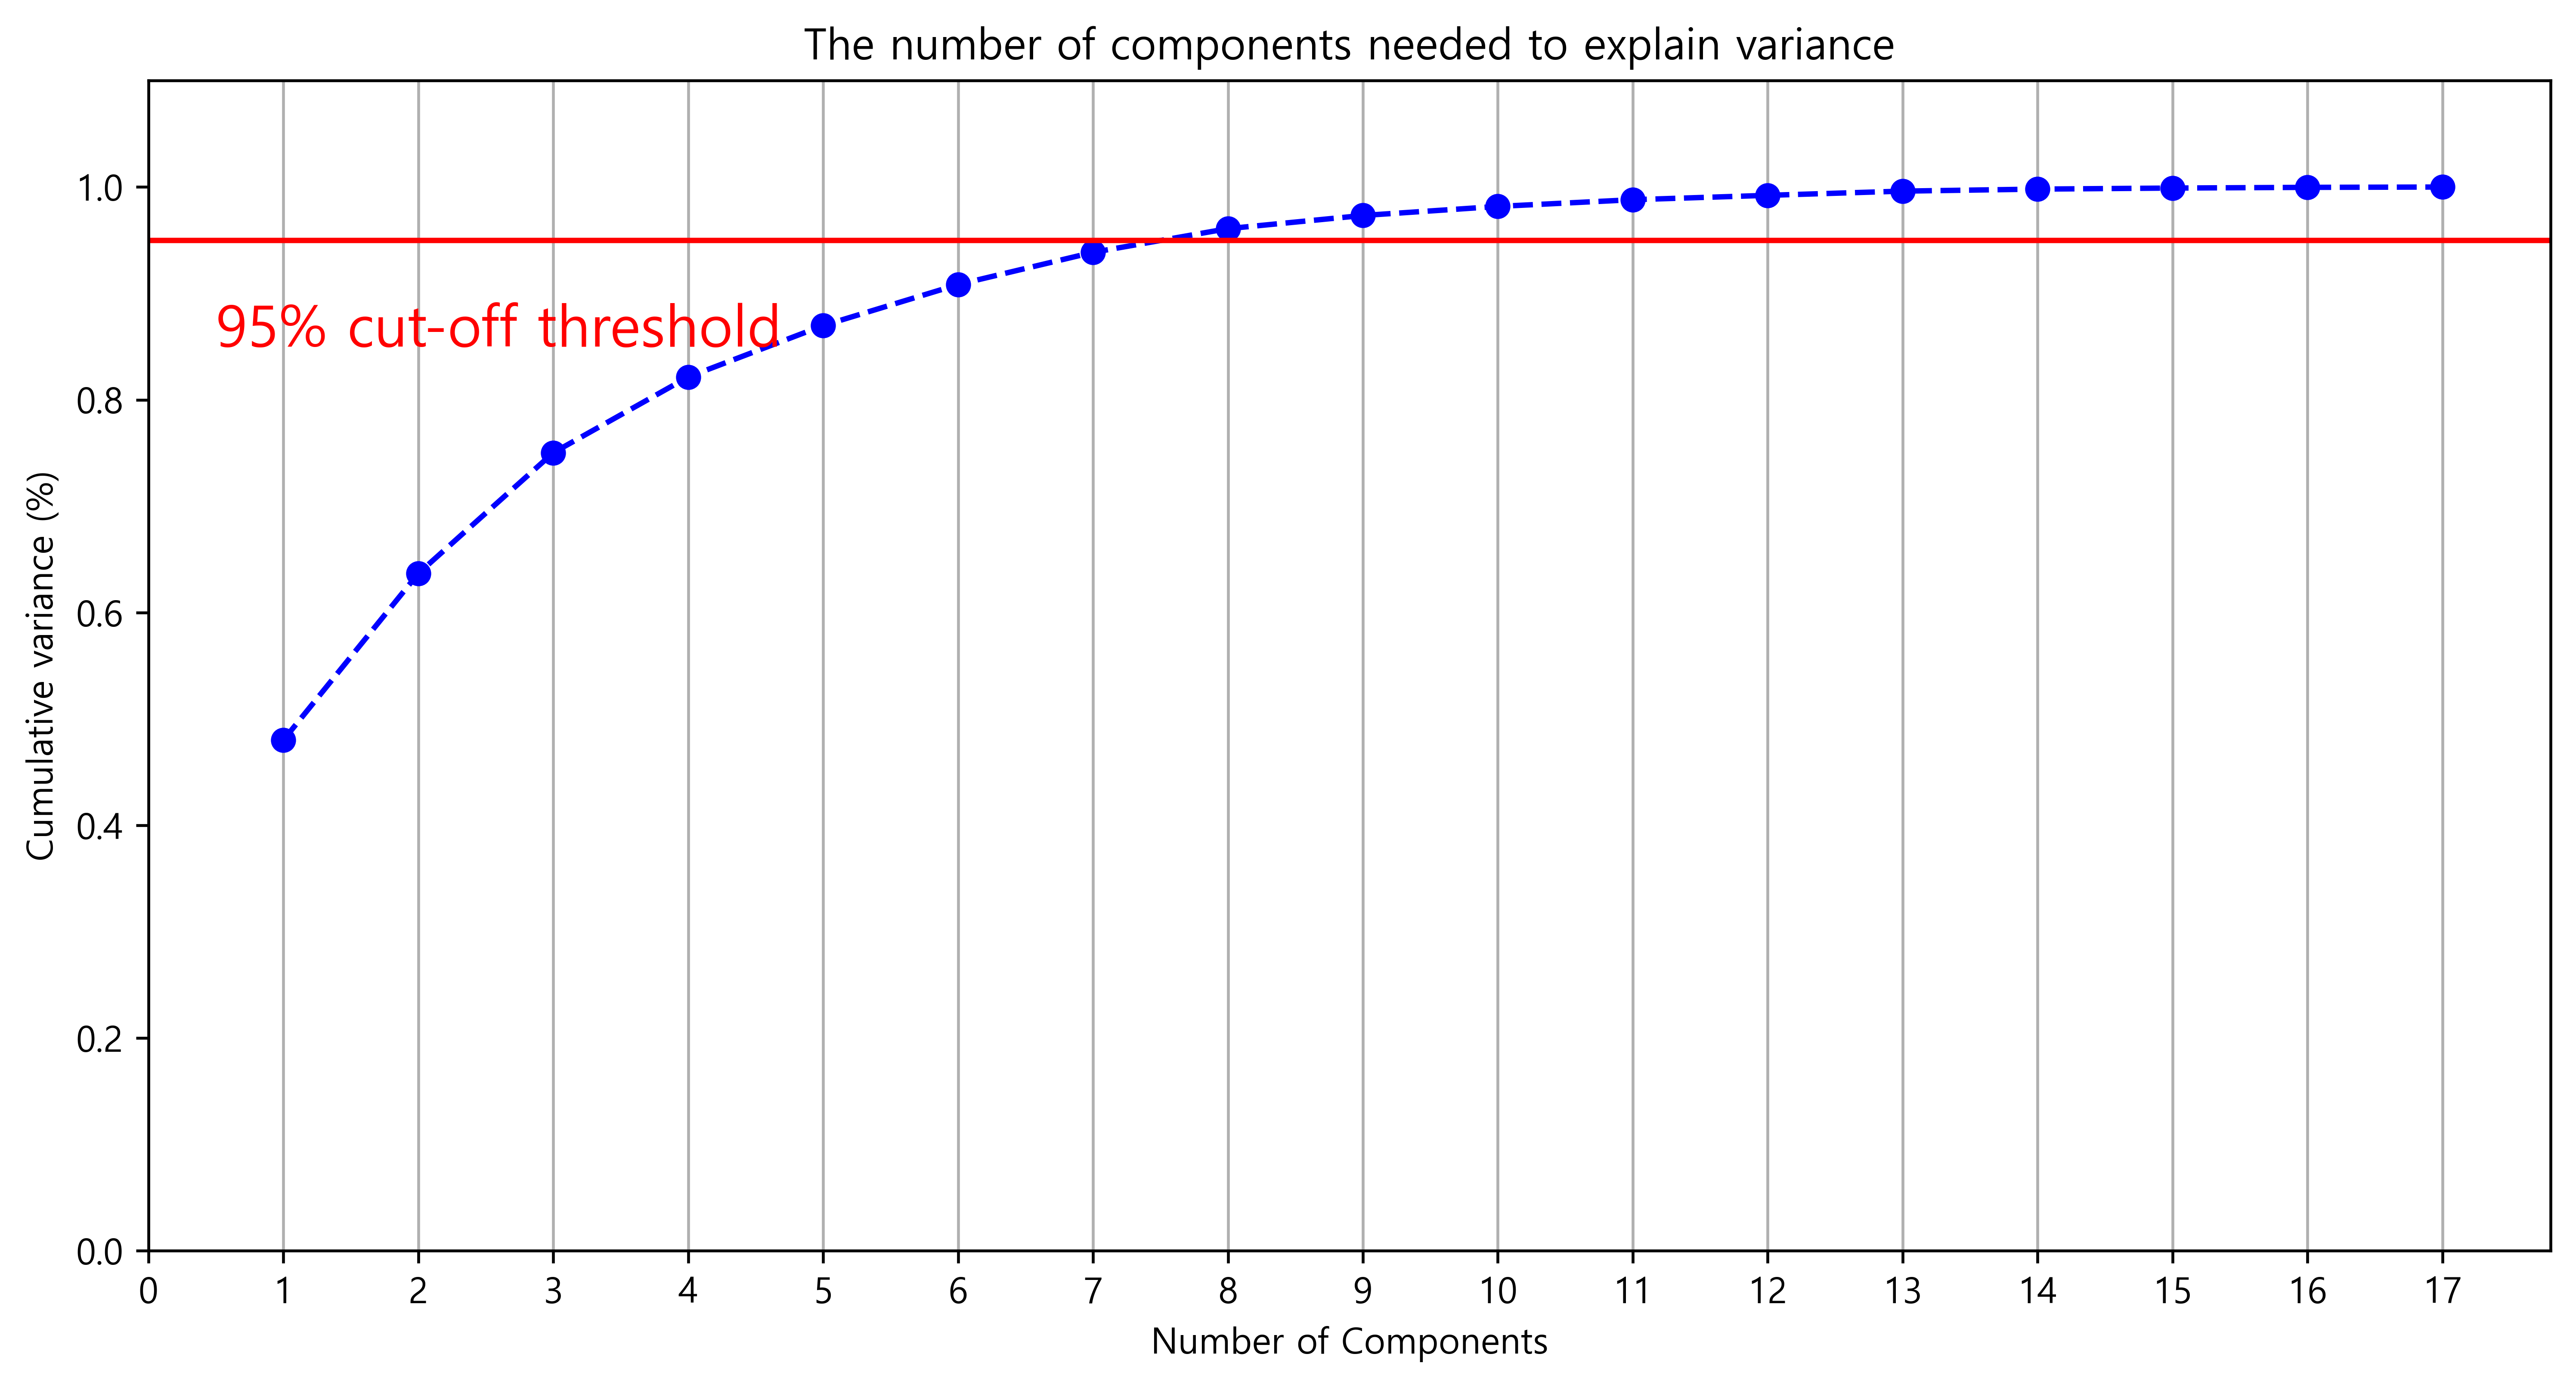

In [12]:
from sklearn.decomposition import PCA

pca = PCA().fit(data_rescaled)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 18, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 18, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_rescaled = scaler.fit_transform(df_nf_for_pca)

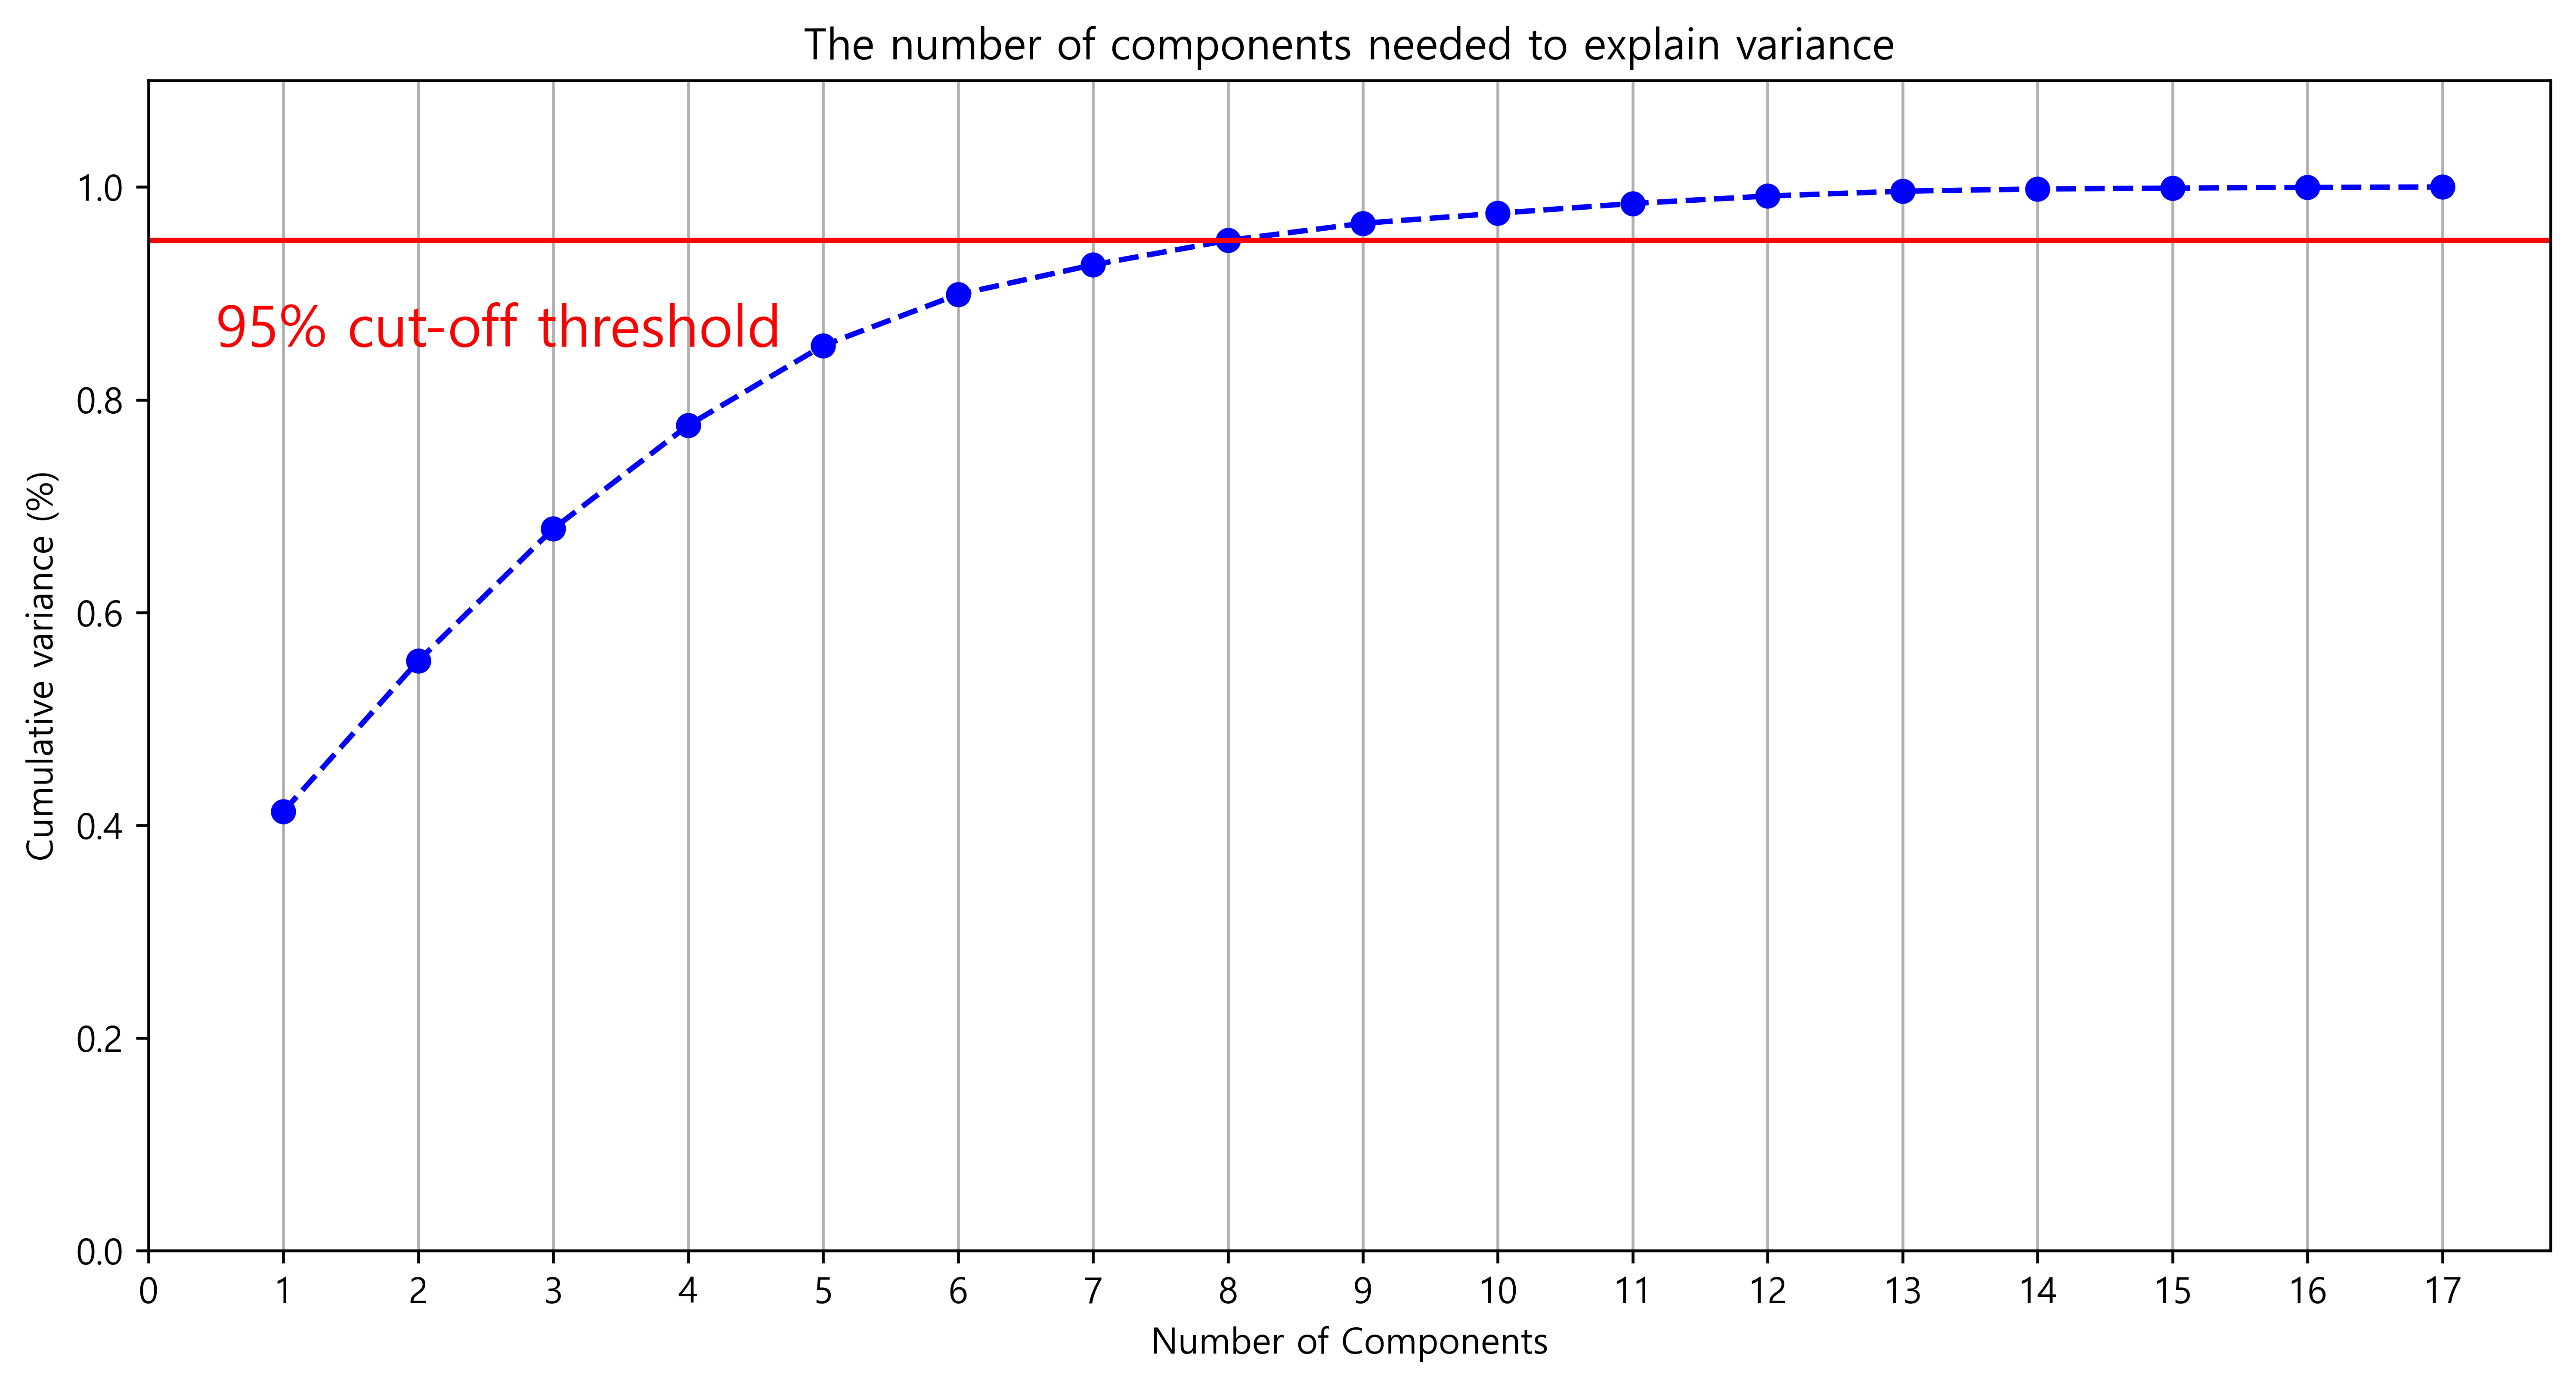

In [14]:
from sklearn.decomposition import PCA

pca = PCA().fit(data_rescaled)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 18, step=1)
y = np.cumsum(pca.explained_variance_ratio_)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 18, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [15]:
data = PCA(n_components=8).fit_transform(df_nf_for_pca)
df_pca_nf = pd.DataFrame(data, columns = ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df_pca_nf

a         b          c         d         e         f         g  \
0    -4.999713 -0.855742  -5.051495  0.628092  0.938102 -0.593090 -0.283465   
1     1.041137  2.240621   4.539843 -0.945992 -1.475600 -0.428811  0.193814   
2    -8.328558  1.097481  -1.762636 -2.019807  0.125627 -0.062946  0.386624   
3    10.641306 -1.337073   4.813146  0.955065  0.699752 -0.621987 -1.061391   
4     0.104825 -0.444577  -3.322691  3.608258 -0.341729  0.379285 -0.018059   
..         ...       ...        ...       ...       ...       ...       ...   
366   5.431858  6.609412  12.401444  0.624872  2.236273 -0.968502 -0.406391   
367 -13.367791 -5.927485  -7.914295  0.781252  0.233179 -0.391652 -0.310529   
368   3.420176 -4.947789   1.025835  2.966607  0.767012  1.157477  0.009086   
369 -14.598285 -2.109882   6.935522 -1.563694 -0.864962 -0.071234 -0.484632   
370   5.168705 -0.322322   1.479076 -1.035007 -0.554557  0.146030  0.044511   

            h  
0    0.440991  
1   -0.412938  
2    0.479479  
3    0.247912  
4   -0.090330  
..        ...  
366 -0.940007  
367  0.184381  
368  0.400396  
369  0.296722  
370  0.005017  

[371 rows x 8 columns]

In [16]:
df_pca_nf.corr()[df_pca_nf.corr()>0.7]

a    b    c    d    e    f    g    h
a  1.0  NaN  NaN  NaN  NaN  NaN  NaN  NaN
b  NaN  1.0  NaN  NaN  NaN  NaN  NaN  NaN
c  NaN  NaN  1.0  NaN  NaN  NaN  NaN  NaN
d  NaN  NaN  NaN  1.0  NaN  NaN  NaN  NaN
e  NaN  NaN  NaN  NaN  1.0  NaN  NaN  NaN
f  NaN  NaN  NaN  NaN  NaN  1.0  NaN  NaN
g  NaN  NaN  NaN  NaN  NaN  NaN  1.0  NaN
h  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0

In [17]:
pca_cols = list(df_nf_for_pca.columns)
npca_cols = df_0.columns.tolist()
npca_features = [item for item in npca_cols if item not in pca_cols]
len(npca_features)

22

In [18]:
df_1 = pd.concat([df_0[npca_features].reset_index(drop=True), df_pca_nf.reset_index(drop=True)], axis=1)
df_2 = df_1.drop('follower', axis=1)
df_2

age    rating     league  value  captain  passes_total  \
0    25.000000  2.333333  53.030000   20.0   0.0000       22.1879   
1    27.000000  5.250000  50.142500   32.0   0.8864       12.3215   
2    24.000000  6.000000  48.356429   24.0   0.0000       58.0206   
3    25.000000  7.000000  49.798182   32.0   0.0000       23.4885   
4    32.000000  4.833333  46.375000   32.0   0.0000       32.2451   
..         ...       ...        ...    ...      ...           ...   
366  28.000000  3.888889  52.343333   44.0   0.0000       21.4995   
367  23.076923  1.615385  47.906923   24.0   0.0000        4.1156   
368  32.000000  6.153846  48.908462   22.5   0.0300       38.4769   
369  26.000000  6.545455  49.124545   24.0   0.0347       16.8654   
370  23.000000  4.384615  49.529231   44.0   0.0211       38.4372   

     passes_accuracy  tackles_total  tackles_blocks  tackles_interceptions  \
0             3.2985         1.2112          0.1417                 0.8504   
1             4.0185         0.4629          0.0985                 0.2659   
2            13.4535         1.0302          0.3802                 1.3368   
3             9.1604         0.7757          0.1141                 0.9354   
4             6.1456         0.4321          0.0480                 0.4225   
..               ...            ...             ...                    ...   
366           4.2611         1.1758          0.0216                 0.3452   
367           2.3641         0.1397          0.0215                 0.0430   
368           8.6548         0.7695          0.0300                 0.5297   
369           7.4314         0.3936          0.0695                 0.3010   
370           6.6013         1.0018          0.1371                 0.9807   

     fouls_drawn  fouls_committed  cards_yellow  cards_yellowred  cards_red  \
0         0.5283           0.7473        0.1804           0.0129     0.0000   
1         2.8563           1.7039        0.1083           0.0000     0.0000   
2         0.5641           0.5887        0.0981           0.0000     0.0000   
3         1.6085           1.6541        0.2738           0.0114     0.0114   
4         0.6434           0.4225        0.0960           0.0000     0.0000   
..           ...              ...           ...              ...        ...   
366       3.0097           1.4671        0.2050           0.0108     0.0000   
367       0.2794           0.5803        0.1612           0.0000     0.0107   
368       1.6690           0.6396        0.0800           0.0000     0.0000   
369       1.8636           1.7595        0.1042           0.0000     0.0000   
370       1.4341           1.2232        0.1582           0.0000     0.0000   

     penalty_won  penalty_commited  penalty_success  penalty_missed  \
0         0.0000            0.0000           0.0000          0.0000   
1         0.0394            0.0000           0.0985          0.0295   
2         0.0000            0.0000           0.0000          0.0000   
3         0.0114            0.0114           0.0000          0.0000   
4         0.0096            0.0192           0.0096          0.0096   
..           ...               ...              ...             ...   
366       0.1187            0.0000           0.0000          0.0000   
367       0.0000            0.0000           0.0000          0.0107   
368       0.0500            0.0000           0.0500          0.0000   
369       0.0463            0.0000           0.0116          0.0000   
370       0.0000            0.0000           0.0105          0.0000   

     games_lineups  games_played          a         b          c         d  \
0           0.9277         77.61  -4.999713 -0.855742  -5.051495  0.628092   
1           0.9948        101.53   1.041137  2.240621   4.539843 -0.945992   
2           1.0056         81.54  -8.328558  1.097481  -1.762636 -2.019807   
3           0.9697         87.66  10.641306 -1.337073   4.813146  0.955065   
4           1.0755        104.14   0.104825 -0.444577

# Decision Tree Regressor

# No Follower

In [168]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

z = 10
scores_rm = np.zeros([3, z])

cv = KFold(z, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_2)):
    df_train = df_2.iloc[idx_train]
    df_test = df_2.iloc[idx_test]
    
    X_train = df_train.drop('value', axis=1).astype(float)
    X_train = StandardScaler().fit_transform(X_train)
    y_train = df_train['value']
    
    model = DecisionTreeRegressor(random_state = 42)
    result = model.fit(X_train, y_train)
    
    pred = result.predict(StandardScaler().fit_transform(df_test.drop('value', axis=1)))
    rsquared = r2_score(df_test.value, pred)
    mse = mean_squared_error(df_test.value, pred)
    
    scores_rm[0, i] = rsquared
    scores_rm[1, i] = mse
    scores_rm[2, i] = model.score(df_test.drop("value", axis=1), df_test['value'])
    
    print("R2 = {:.8f}".format(rsquared))
    print("mse = {:.8f}".format(mse))
    print("R2 Score = {:.8f}".format(scores_rm[2, i]))
    
print("모델 성능 : Metrics R2 = {}, R2 Score = {}, mse = {}".format(scores_rm[0].mean(), scores_rm[2].mean(), scores_rm[1].mean()))

R2 = -2.38084158
mse = 1495.18421053
R2 Score = -2.52243146
R2 = 0.21574906
mse = 486.71621622
R2 Score = -0.94524369
R2 = -0.32675058
mse = 548.04054054
R2 Score = -1.94484321
R2 = -1.93094074
mse = 752.09459459
R2 Score = -3.99605457
R2 = -0.67906686
mse = 296.14189189
R2 Score = -5.14246784
R2 = 0.20544249
mse = 856.13513514
R2 Score = -1.10787125
R2 = -0.97792470
mse = 779.96621622
R2 Score = -2.94346114
R2 = -0.06277242
mse = 787.13513514
R2 Score = -0.53279852
R2 = -1.23044938
mse = 538.07432432
R2 Score = -7.26169540
R2 = -0.83644515
mse = 705.79054054
R2 Score = -1.46983122
모델 성능 : Metrics R2 = -0.8003999851329884, R2 Score = -2.786669830344025, mse = 724.527880512091


In [139]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

z = 10
scores_rm = np.zeros([3, z])
mseListNf = []

cv = KFold(z, shuffle=True, random_state=0)
for n in range(1, 29):
    for m in range(1, 100):
        for i, (idx_train, idx_test) in enumerate(cv.split(df_2)):
            df_train = df_2.iloc[idx_train]
            df_test = df_2.iloc[idx_test]

            X_train = df_train.drop('value', axis=1).astype(float)
            X_train = StandardScaler().fit_transform(X_train)
            y_train = df_train['value']

            model = DecisionTreeRegressor(min_samples_leaf=m, max_features=n, random_state = 42)
            result = model.fit(X_train, y_train)

            pred = result.predict(StandardScaler().fit_transform(df_test.drop('value', axis=1)))
            rsquared = r2_score(df_test.value, pred)
            mse = mean_squared_error(df_test.value, pred)

            scores_rm[0, i] = rsquared
            scores_rm[1, i] = mse
            scores_rm[2, i] = model.score(df_test.drop("value", axis=1), df_test['value'])

        #     print("R2 = {:.8f}".format(rsquared))
        #     print("mse = {:.8f}".format(mse))
        #     print("R2 Score = {:.8f}".format(scores_rm[2, i]))

    #     print("모델 성능 : Metrics R2 = {}, R2 Score = {}, mse = {}".format(scores_rm[0].mean(), scores_rm[2].mean(), scores_rm[1].mean()))
        mseListNf.append(scores_rm[1].mean())

In [140]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

z = 10
scores_rm = np.zeros([3, z])
mseList = []

cv = KFold(z, shuffle=True, random_state=0)
for n in range(1, 29):
    for m in range(1, 100):
        for i, (idx_train, idx_test) in enumerate(cv.split(df_1)):
            df_train = df_1.iloc[idx_train]
            df_test = df_1.iloc[idx_test]

            X_train = df_train.drop('value', axis=1).astype(float)
            X_train = StandardScaler().fit_transform(X_train)
            y_train = df_train['value']

            model = DecisionTreeRegressor(min_samples_leaf=m, max_features=n, random_state = 42)
            result = model.fit(X_train, y_train)

            pred = result.predict(StandardScaler().fit_transform(df_test.drop('value', axis=1)))
            rsquared = r2_score(df_test.value, pred)
            mse = mean_squared_error(df_test.value, pred)

            scores_rm[0, i] = rsquared
            scores_rm[1, i] = mse
            scores_rm[2, i] = model.score(df_test.drop("value", axis=1), df_test['value'])

        #     print("R2 = {:.8f}".format(rsquared))
        #     print("mse = {:.8f}".format(mse))
        #     print("R2 Score = {:.8f}".format(scores_rm[2, i]))

    #     print("모델 성능 : Metrics R2 = {}, R2 Score = {}, mse = {}".format(scores_rm[0].mean(), scores_rm[2].mean(), scores_rm[1].mean()))
        mseList.append(scores_rm[1].mean())

C:\Users\Gk\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


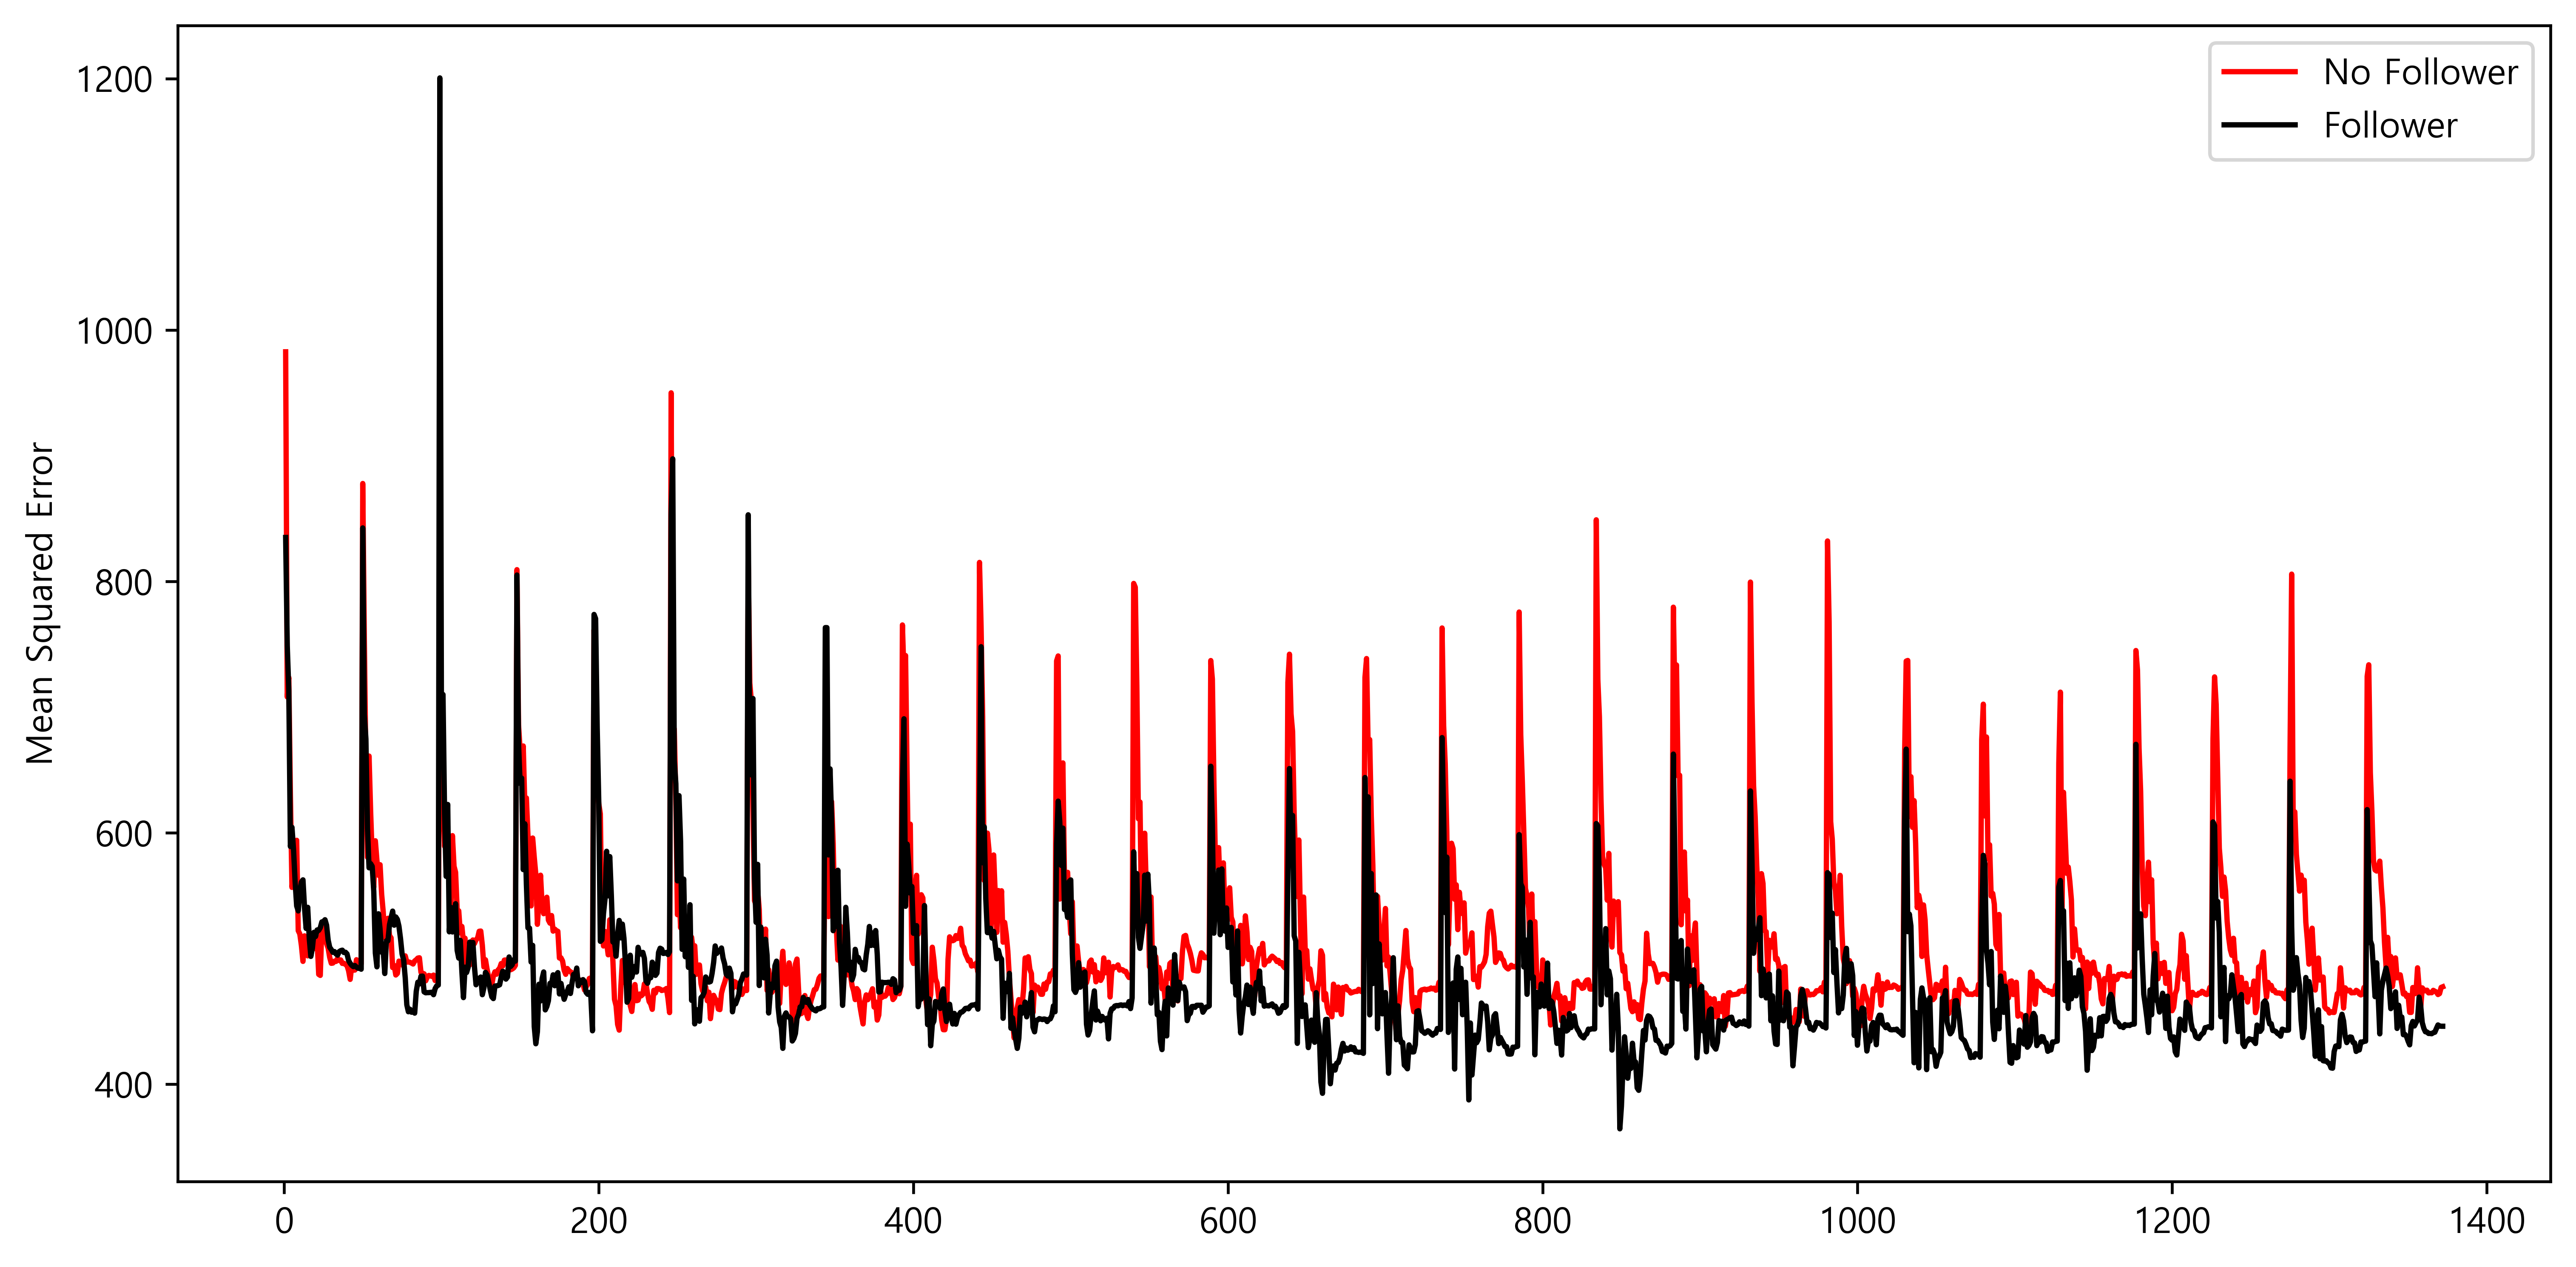

In [138]:
dVal = list(range(1, 1373))
fig = plt.figure()
fig.show()
ax = fig.add_subplot(111)

ax.plot(dVal, mseListNf, color='red', label='No Follower')
ax.plot(dVal, mseList, color='black', label='Follower')
plt.legend(loc='upper right')
# plt.title('Support Vector Regressor (Gaussian) with and without Follower')
# plt.xlabel('C Value')
plt.ylabel('Mean Squared Error')
plt.draw()

C:\Users\Gk\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


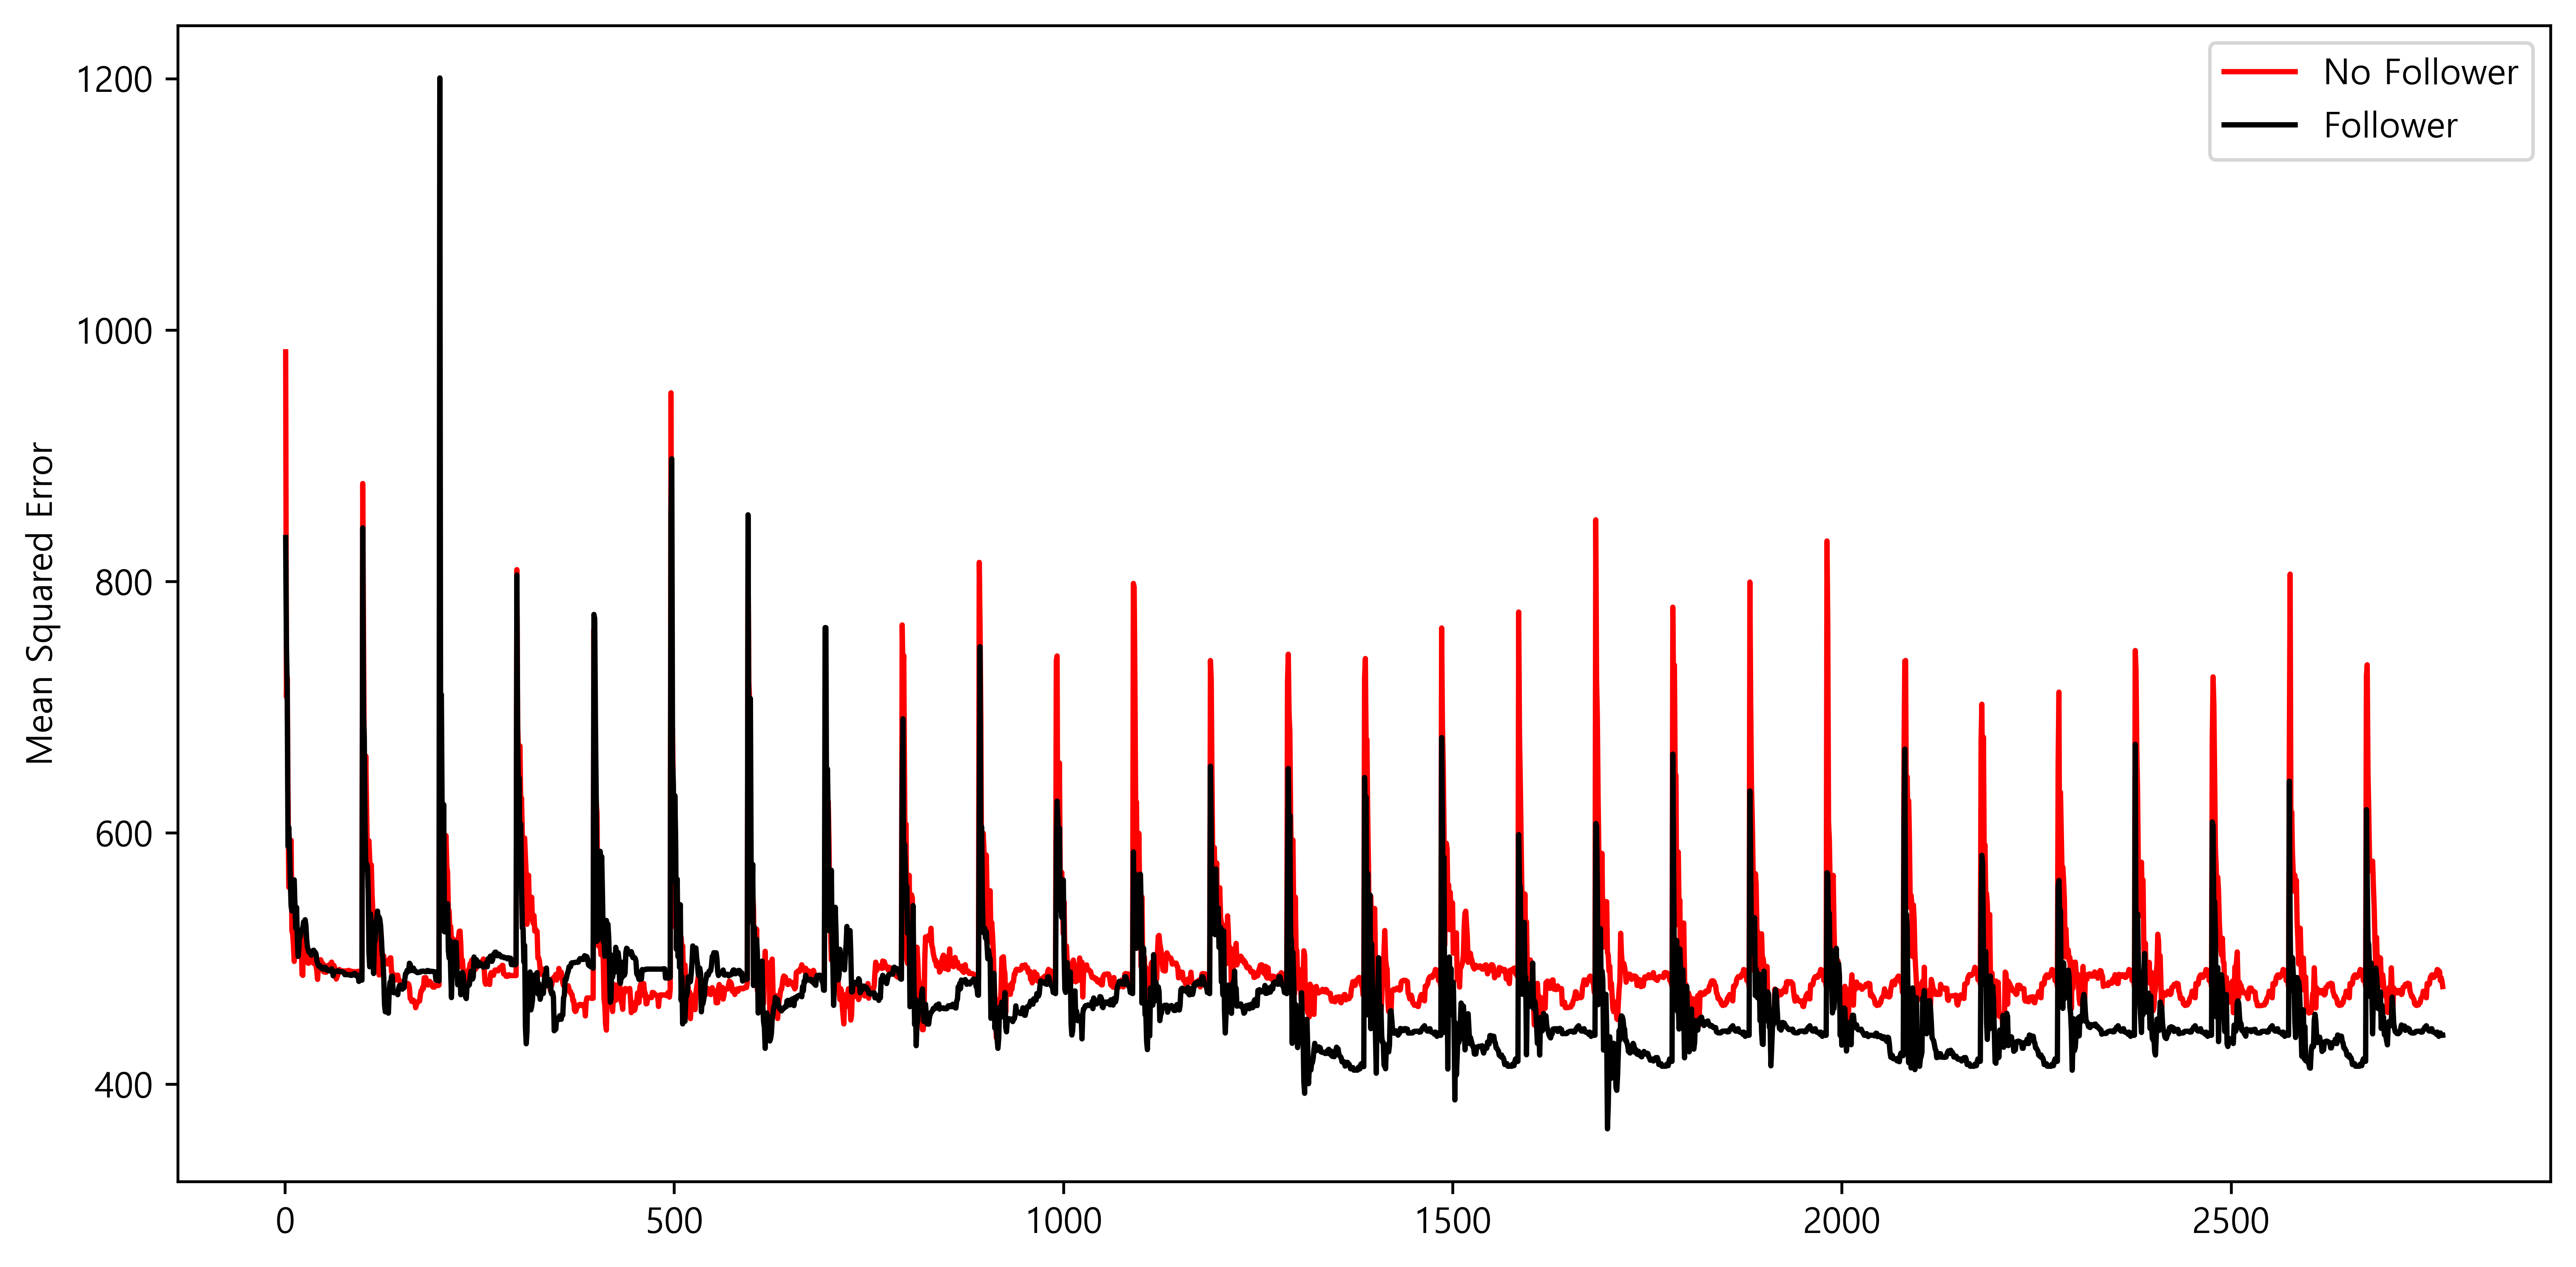

In [142]:
dVal = list(range(1, 2773))
fig = plt.figure()
fig.show()
ax = fig.add_subplot(111)

ax.plot(dVal, mseListNf, color='red', label='No Follower')
ax.plot(dVal, mseList, color='black', label='Follower')
plt.legend(loc='upper right')
# plt.title('Support Vector Regressor (Gaussian) with and without Follower')
# plt.xlabel('C Value')
plt.ylabel('Mean Squared Error')
plt.draw()

In [169]:
pd.DataFrame(model.feature_importances_, index=df_2.drop('value', axis=1).columns, columns=['Feature_Importances']).sort_values(by='Feature_Importances', ascending=False)

Feature_Importances
penalty_won                       0.175690
d                                 0.157205
games_played                      0.116767
passes_total                      0.084849
passes_accuracy                   0.074133
f                                 0.071273
tackles_interceptions             0.064394
g                                 0.041304
fouls_drawn                       0.026966
games_lineups                     0.025516
c                                 0.025153
age                               0.021713
penalty_missed                    0.019136
tackles_blocks                    0.014923
b                                 0.011834
tackles_total                     0.011469
a                                 0.011328
h                                 0.008469
fouls_committed                   0.007783
e                                 0.006892
penalty_commited                  0.005728
penalty_success                   0.004731
rating                            0.003772
league                            0.003300
captain                           0.002570
cards_yellow                      0.002320
cards_yellowred                   0.000588
cards_red                         0.000192

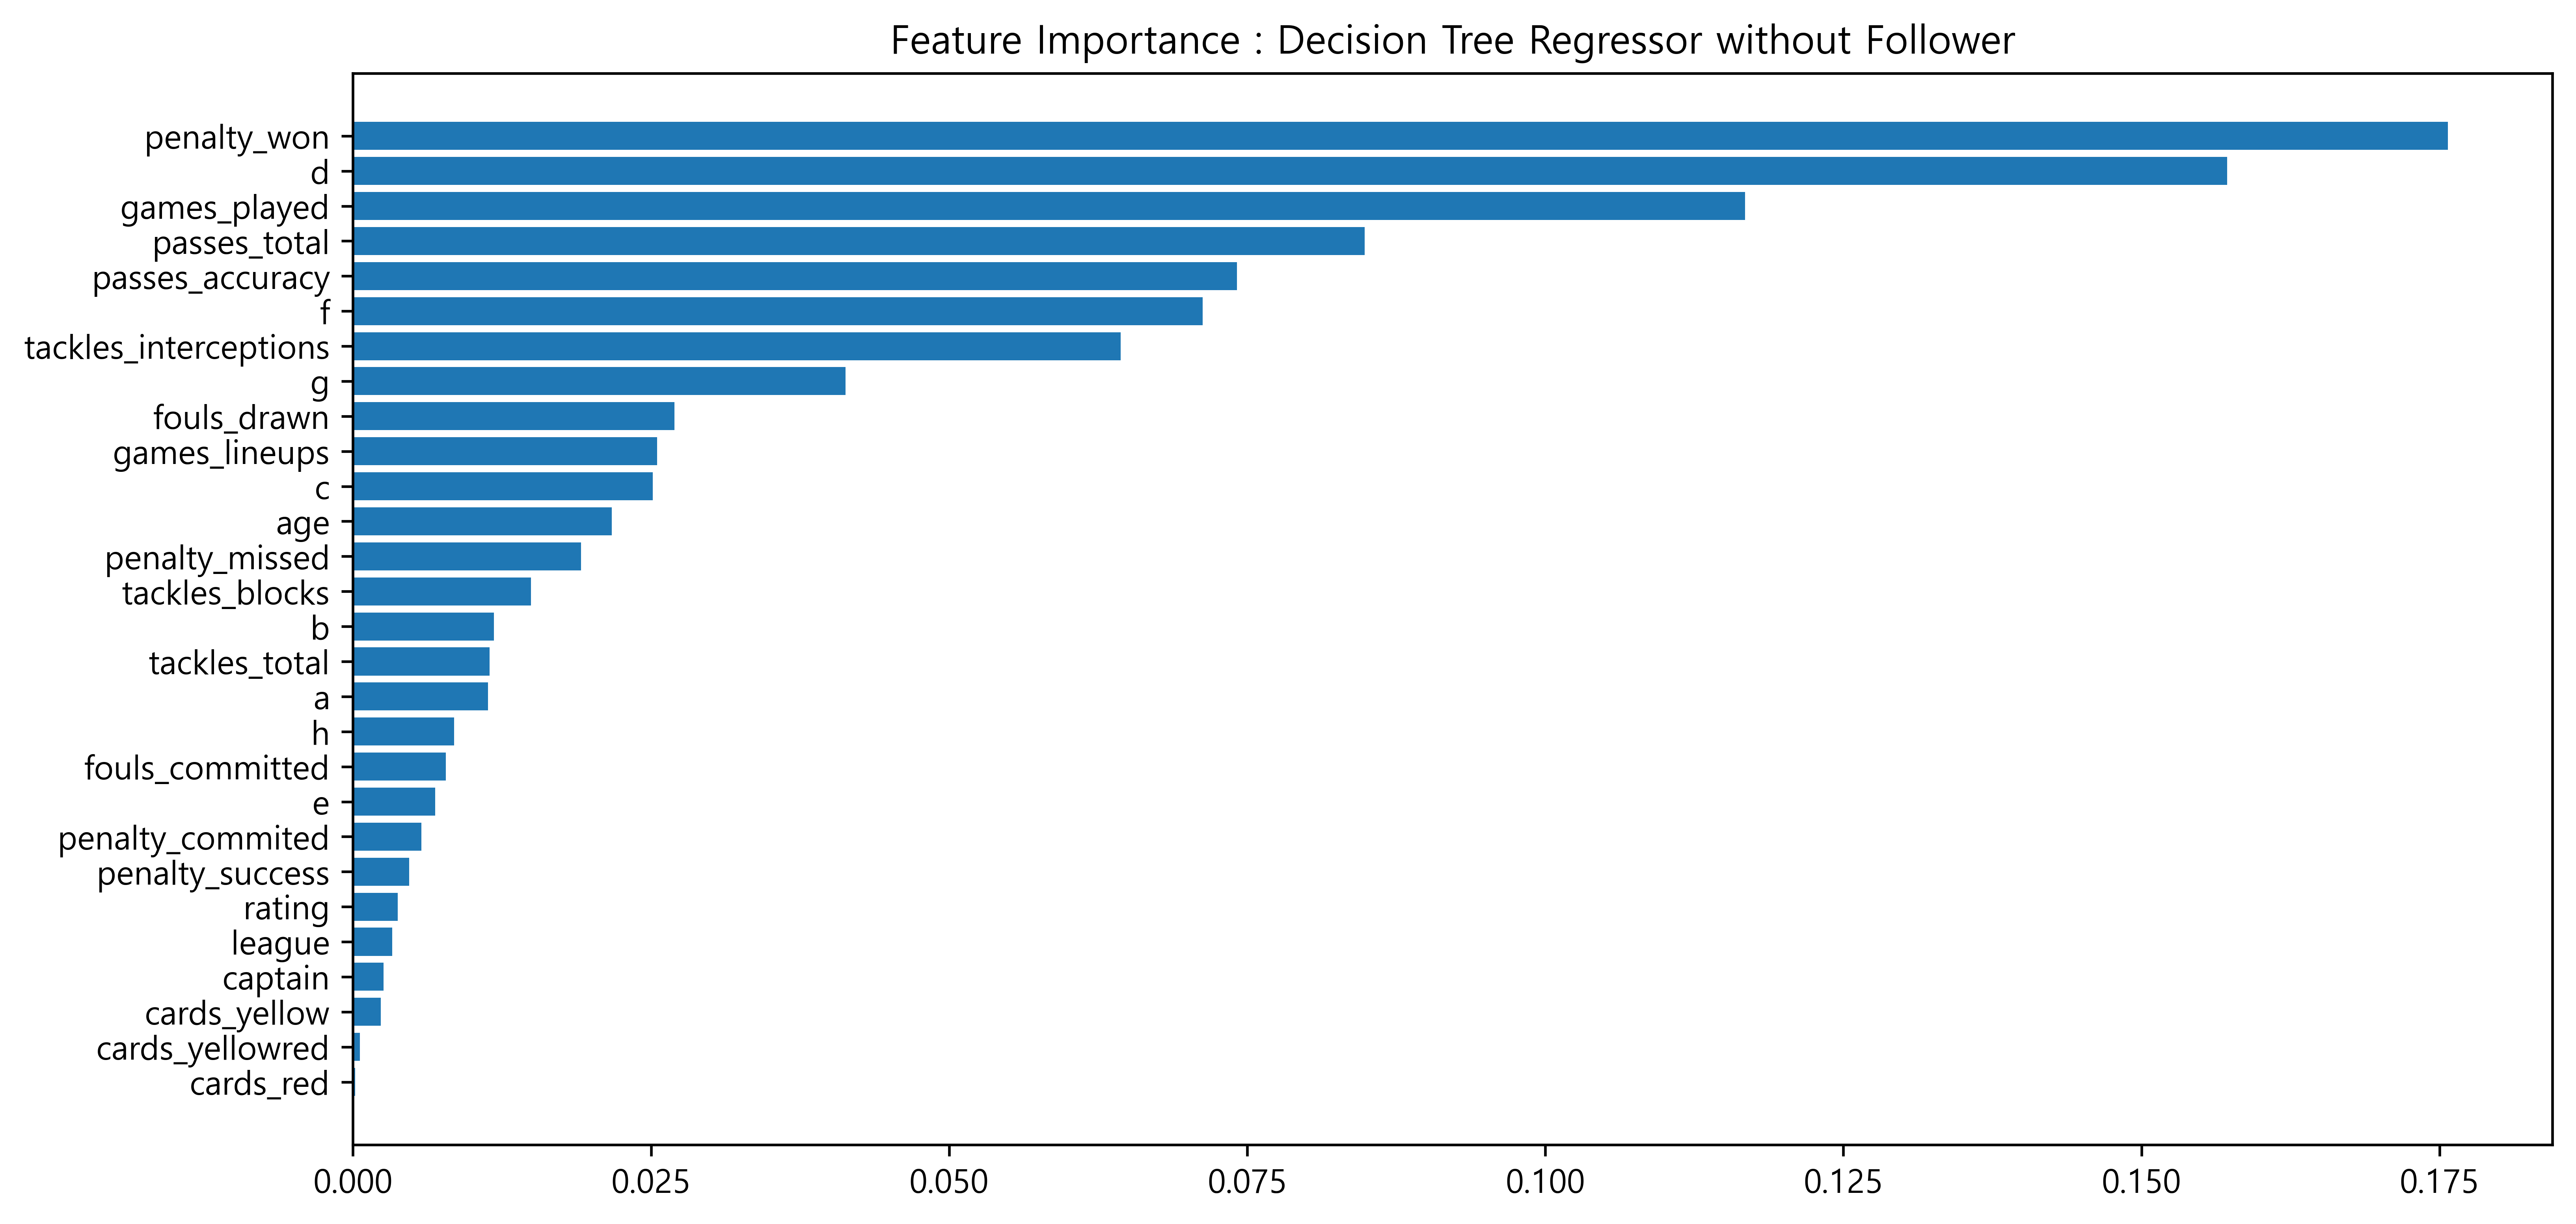

In [170]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title("Feature Importance : Decision Tree Regressor without Follower")
    plt.show()

f_importances(model.feature_importances_, df_2.drop('value', axis=1).columns)

# Follower

In [73]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor

z = 10
scores_rm = np.zeros([3, z])

cv = KFold(z, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_1)):
    df_train = df_1.iloc[idx_train]
    df_test = df_1.iloc[idx_test]
    
    X_train = df_train.drop('value', axis=1).astype(float)
    X_train = StandardScaler().fit_transform(X_train)
    y_train = df_train['value']
    
    model = DecisionTreeRegressor(random_state = 42)
    result = model.fit(X_train, y_train)
    
    pred = result.predict(StandardScaler().fit_transform(df_test.drop('value', axis=1)))
    rsquared = r2_score(df_test.value, pred)
    mse = mean_squared_error(df_test.value, pred)
    
    scores_rm[0, i] = rsquared
    scores_rm[1, i] = mse
    scores_rm[2, i] = model.score(df_test.drop("value", axis=1), df_test['value'])
    
    print("R2 = {:.8f}".format(rsquared))
    print("mse = {:.8f}".format(mse))
    print("R2 Score = {:.8f}".format(scores_rm[2, i]))
    
print("모델 성능 : Metrics R2 = {}, R2 Score = {}, mse = {}".format(scores_rm[0].mean(), scores_rm[2].mean(), scores_rm[1].mean()))

R2 = 0.20672177
mse = 350.82894737
R2 Score = -2.45473073
R2 = 0.02906568
mse = 602.57432432
R2 Score = -0.73725399
R2 = -0.45512363
mse = 601.06756757
R2 Score = -2.37537058
R2 = -1.48338706
mse = 637.25000000
R2 Score = -8.28448088
R2 = -4.06252317
mse = 892.89189189
R2 Score = -5.15350097
R2 = 0.54121120
mse = 494.34459459
R2 Score = -1.58053727
R2 = 0.20757930
mse = 312.47972973
R2 Score = -0.32989670
R2 = 0.18464767
mse = 603.88513514
R2 Score = -2.91346312
R2 = -3.35984442
mse = 1051.77027027
R2 Score = -16.44299078
R2 = -1.03579466
mse = 782.40540541
R2 Score = -0.22797117
모델 성능 : Metrics R2 = -0.9227447331543045, R2 Score = -4.050019619971297, mse = 632.949786628734


In [75]:
34pd.DataFrame(model.feature_importances_, index=df_1.drop('value', axis=1).columns, columns=['Feature_Importances']).sort_values(by='Feature_Importances', ascending=False)

Feature_Importances
follower                          0.320933
d                                 0.159859
games_played                      0.084936
age                               0.073896
passes_accuracy                   0.068263
c                                 0.061418
league                            0.030720
passes_total                      0.030177
e                                 0.028044
b                                 0.026200
f                                 0.021964
g                                 0.016488
rating                            0.012241
a                                 0.011826
h                                 0.009911
tackles_blocks                    0.008003
games_lineups                     0.005942
tackles_total                     0.004688
penalty_commited                  0.003899
tackles_interceptions             0.003088
captain                           0.002830
cards_yellowred                   0.002721
penalty_won                       0.002708
fouls_drawn                       0.002522
cards_yellow                      0.002436
penalty_missed                    0.002119
penalty_success                   0.000988
fouls_committed                   0.000907
cards_red                         0.000271

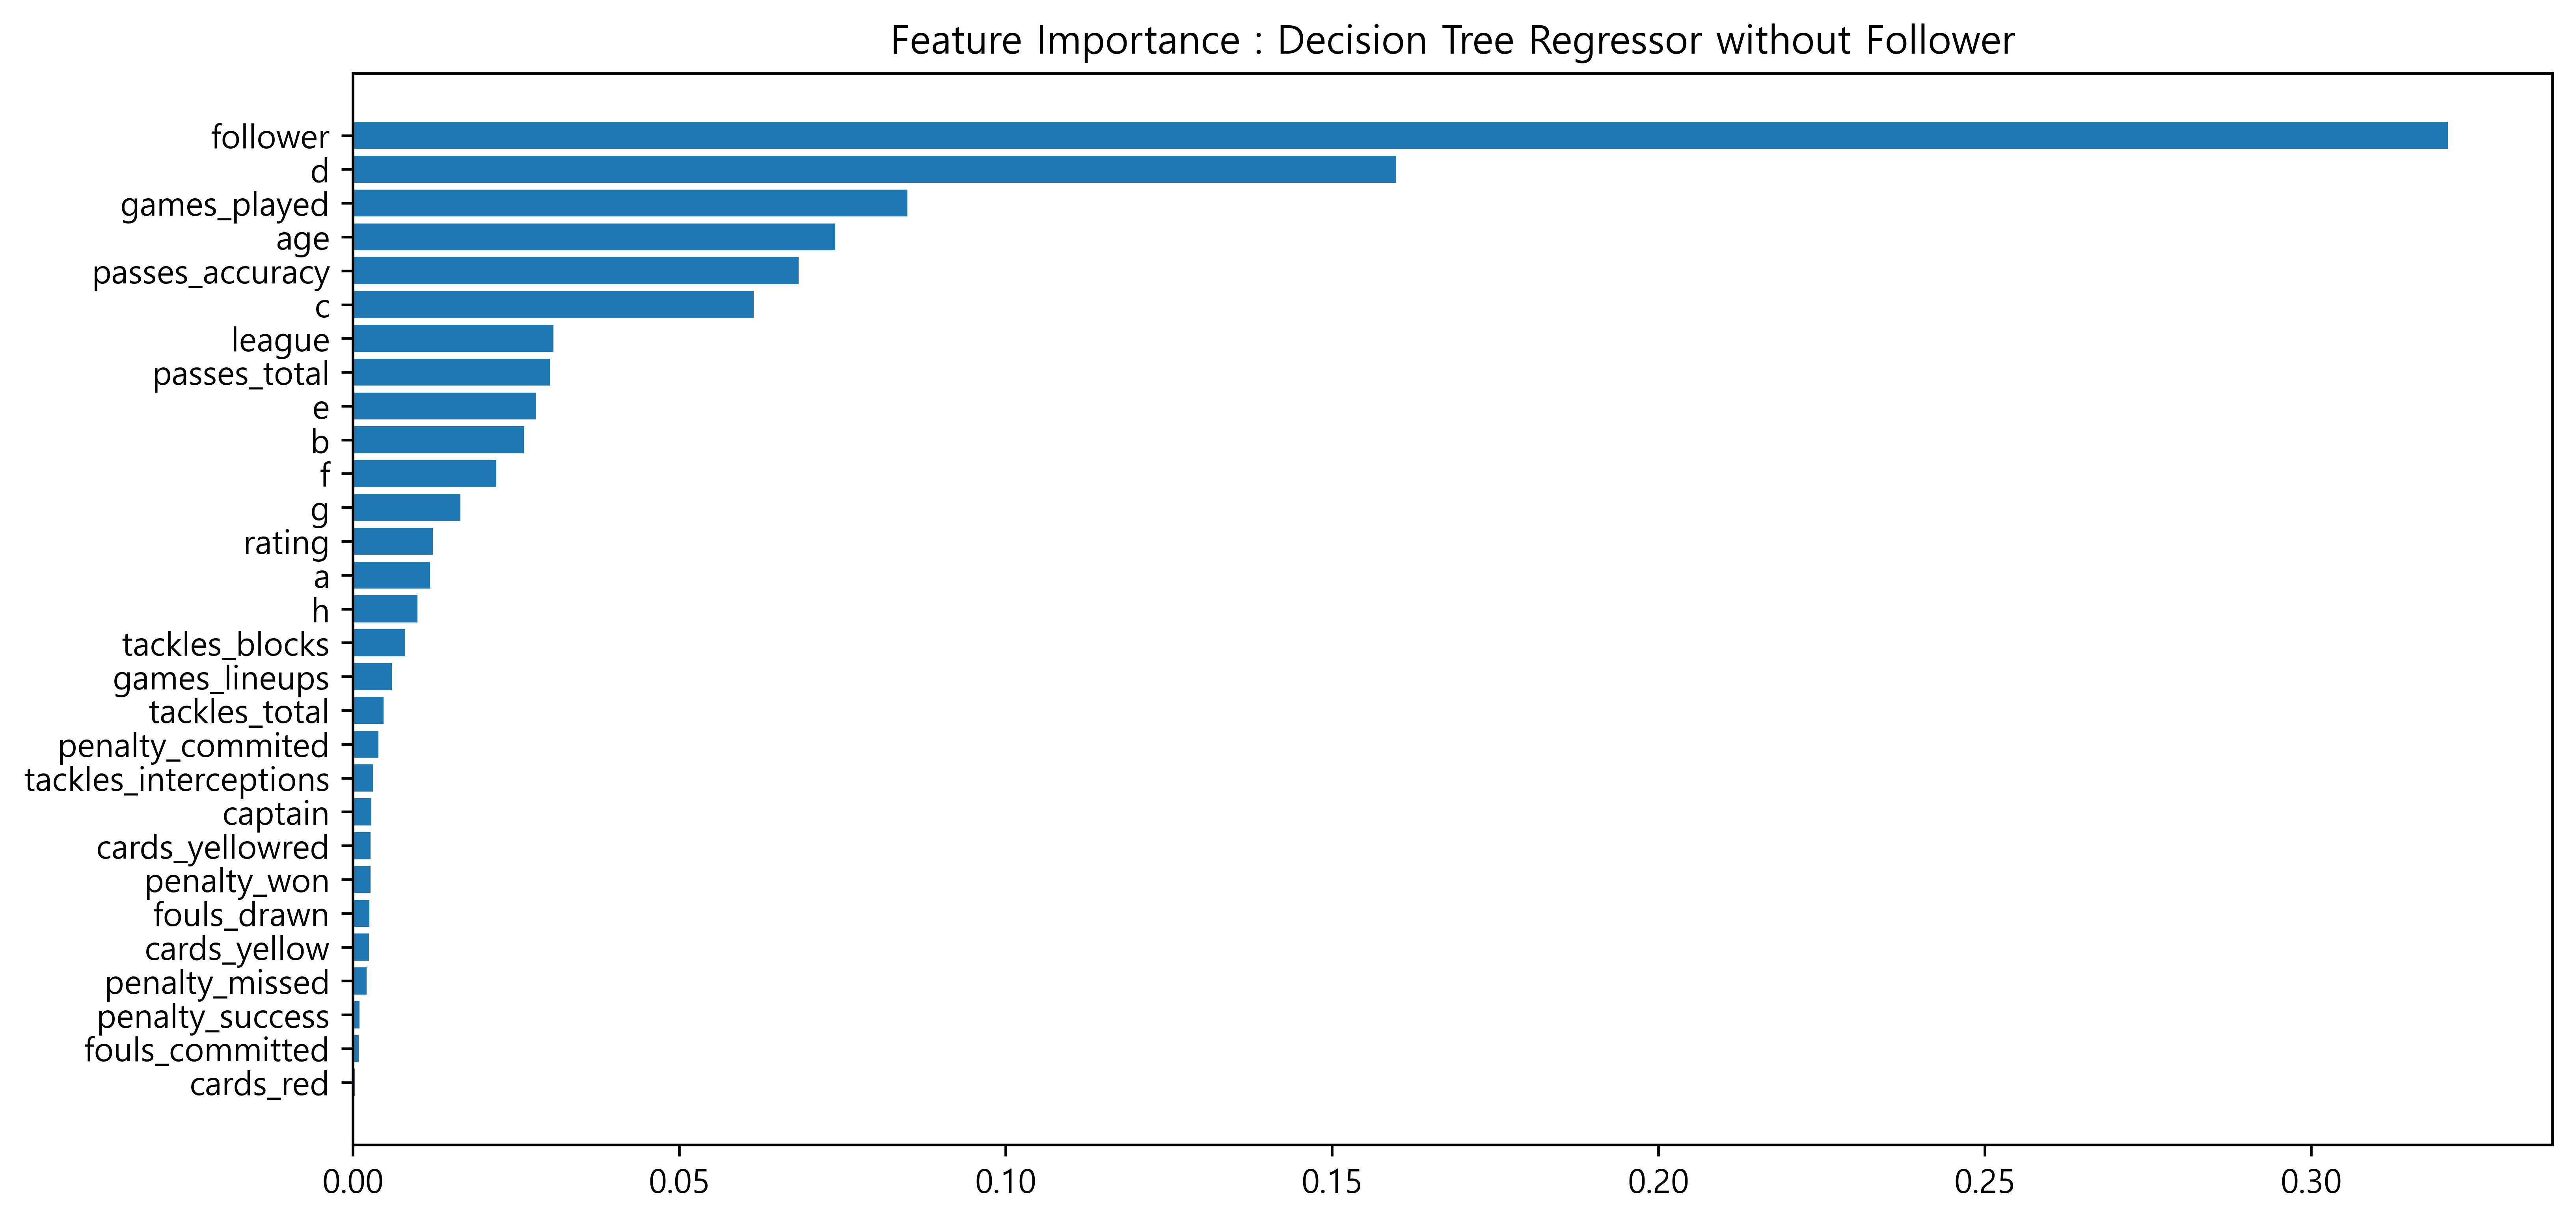

In [76]:
from matplotlib import pyplot as plt
from sklearn import svm

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title("Feature Importance : Decision Tree Regressor with Follower")
    plt.show()

f_importances(model.feature_importances_, df_1.drop('value', axis=1).columns)

# Random Forest Regressor

# No Follower

In [162]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

z = 10
scores_rm = np.zeros([3, z])

cv = KFold(z, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_2)):
    df_train = df_2.iloc[idx_train]
    df_test = df_2.iloc[idx_test]
    
    X_train = df_train.drop('value', axis=1).astype(float)
    X_train = StandardScaler().fit_transform(X_train)
    y_train = df_train['value']
    
    model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
    result = model.fit(X_train, y_train)
    
    pred = result.predict(StandardScaler().fit_transform(df_test.drop('value', axis=1)))
    rsquared = r2_score(df_test.value, pred)
    mse = mean_squared_error(df_test.value, pred)
    
    scores_rm[0, i] = rsquared
    scores_rm[1, i] = mse
    scores_rm[2, i] = model.score(df_test.drop("value", axis=1), df_test['value'])
    
    print("R2 = {:.8f}".format(rsquared))
    print("mse = {:.8f}".format(mse))
    print("R2 Score = {:.8f}".format(scores_rm[2, i]))
    
print("모델 성능 : Metrics R2 = {}, R2 Score = {}, mse = {}".format(scores_rm[0].mean(), scores_rm[2].mean(), scores_rm[1].mean()))

R2 = -0.45456983
mse = 643.28653146
R2 Score = -2.42822412
R2 = 0.38347642
mse = 382.62245747
R2 Score = -0.75889099
R2 = 0.06345403
mse = 386.85881607
R2 Score = -0.94616605
R2 = 0.32478910
mse = 173.26262001
R2 Score = -3.56748241
R2 = -0.37268179
mse = 242.10386780
R2 Score = -5.35583888
R2 = 0.37015726
mse = 678.65509182
R2 Score = 0.00487263
R2 = 0.43416562
mse = 223.12866436
R2 Score = -1.73859882
R2 = 0.26434963
mse = 544.85442407
R2 Score = -0.34078939
R2 = -0.55361504
mse = 374.79459079
R2 Score = -2.90265448
R2 = 0.31746006
mse = 262.31670179
R2 Score = -1.26535065
모델 성능 : Metrics R2 = 0.07769854638914718, R2 Score = -1.9299123152468354, mse = 391.1883765656472


In [163]:
pd.DataFrame(model.feature_importances_, index=df_2.drop('value', axis=1).columns, columns=['Feature_Importances']).sort_values(by='Feature_Importances', ascending=False)

Feature_Importances
d                                 0.175970
games_played                      0.147674
penalty_won                       0.060027
f                                 0.059091
c                                 0.052604
g                                 0.052295
passes_total                      0.045952
passes_accuracy                   0.043572
rating                            0.033099
league                            0.032878
e                                 0.030920
games_lineups                     0.030813
cards_yellow                      0.020454
fouls_drawn                       0.020080
h                                 0.019858
age                               0.019828
a                                 0.017869
tackles_total                     0.017004
penalty_missed                    0.015676
tackles_interceptions             0.015317
fouls_committed                   0.014684
tackles_blocks                    0.014501
b                                 0.014114
penalty_success                   0.013837
cards_red                         0.013364
captain                           0.010411
penalty_commited                  0.005805
cards_yellowred                   0.002304

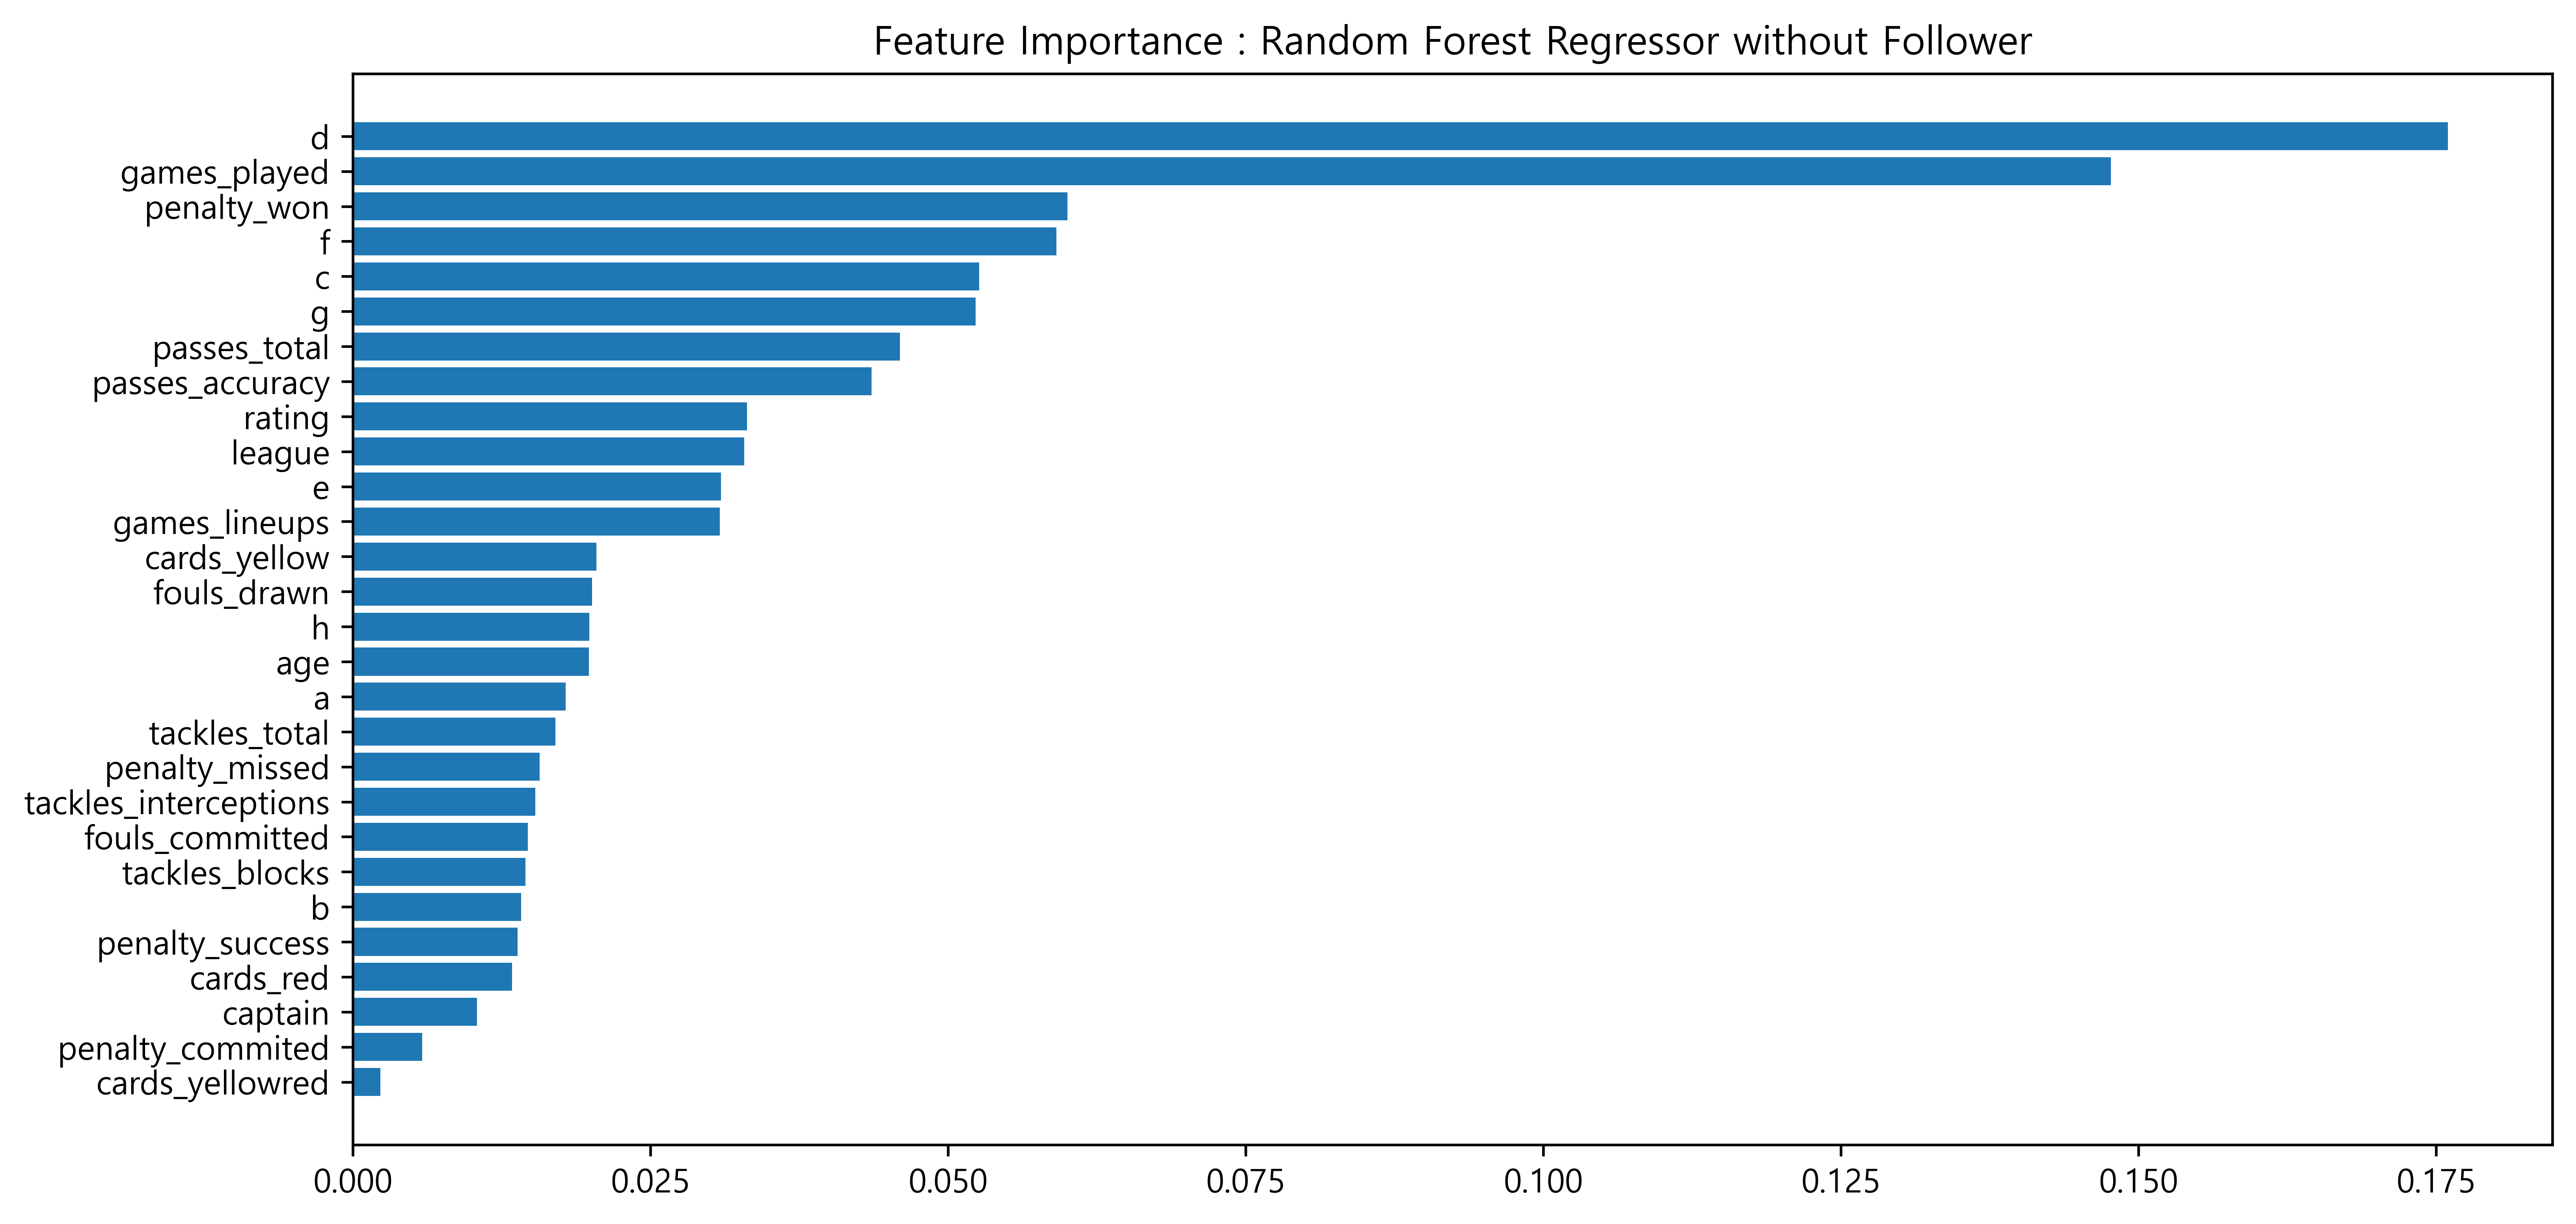

In [164]:
from matplotlib import pyplot as plt

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title("Feature Importance : Random Forest Regressor without Follower")
    plt.show()

f_importances(model.feature_importances_, df_2.drop('value', axis=1).columns)

# Follower

In [165]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

z = 10
scores_rm = np.zeros([3, z])

cv = KFold(z, shuffle=True, random_state=0)
for i, (idx_train, idx_test) in enumerate(cv.split(df_1)):
    df_train = df_1.iloc[idx_train]
    df_test = df_1.iloc[idx_test]
    
    X_train = df_train.drop('value', axis=1).astype(float)
    X_train = StandardScaler().fit_transform(X_train)
    y_train = df_train['value']
    
    model = RandomForestRegressor(n_estimators = 1000, random_state = 42)
    result = model.fit(X_train, y_train)
    
    pred = result.predict(StandardScaler().fit_transform(df_test.drop('value', axis=1)))
    rsquared = r2_score(df_test.value, pred)
    mse = mean_squared_error(df_test.value, pred)
    
    scores_rm[0, i] = rsquared
    scores_rm[1, i] = mse
    scores_rm[2, i] = model.score(df_test.drop("value", axis=1), df_test['value'])
    
    print("R2 = {:.8f}".format(rsquared))
    print("mse = {:.8f}".format(mse))
    print("R2 Score = {:.8f}".format(scores_rm[2, i]))
    
print("모델 성능 : Metrics R2 = {}, R2 Score = {}, mse = {}".format(scores_rm[0].mean(), scores_rm[2].mean(), scores_rm[1].mean()))

R2 = 0.25926952
mse = 327.58959220
R2 Score = -1.33622611
R2 = 0.44063069
mse = 347.15178234
R2 Score = -1.02634032
R2 = 0.11153401
mse = 366.99843089
R2 Score = -0.62521624
R2 = 0.06444369
mse = 240.06860056
R2 Score = -3.01873591
R2 = -1.85209430
mse = 503.03214244
R2 Score = -3.11595052
R2 = 0.41436415
mse = 631.02220041
R2 Score = 0.10677242
R2 = 0.47856415
mse = 205.62074134
R2 Score = -0.99416208
R2 = 0.45309426
mse = 405.06199829
R2 Score = -0.39748102
R2 = -0.28818629
mse = 310.76247564
R2 Score = -2.30250676
R2 = 0.35347735
mse = 248.47437874
R2 Score = -1.22393306
모델 성능 : Metrics R2 = 0.04350972532169519, R2 Score = -1.3933779592246331, mse = 358.5782342852774


In [166]:
pd.DataFrame(model.feature_importances_, index=df_1.drop('value', axis=1).columns, columns=['Feature_Importances']).sort_values(by='Feature_Importances', ascending=False)

Feature_Importances
follower                          0.324225
d                                 0.089848
games_played                      0.062652
age                               0.053730
h                                 0.051335
c                                 0.042239
f                                 0.030815
penalty_won                       0.029596
rating                            0.029421
passes_total                      0.024347
a                                 0.023791
league                            0.021946
g                                 0.020630
games_lineups                     0.019921
cards_yellow                      0.019611
e                                 0.017595
passes_accuracy                   0.017503
tackles_interceptions             0.015553
b                                 0.014219
tackles_total                     0.013171
fouls_drawn                       0.011703
fouls_committed                   0.011693
tackles_blocks                    0.011234
captain                           0.009615
penalty_success                   0.009261
cards_red                         0.008415
penalty_missed                    0.007283
penalty_commited                  0.006721
cards_yellowred                   0.001928

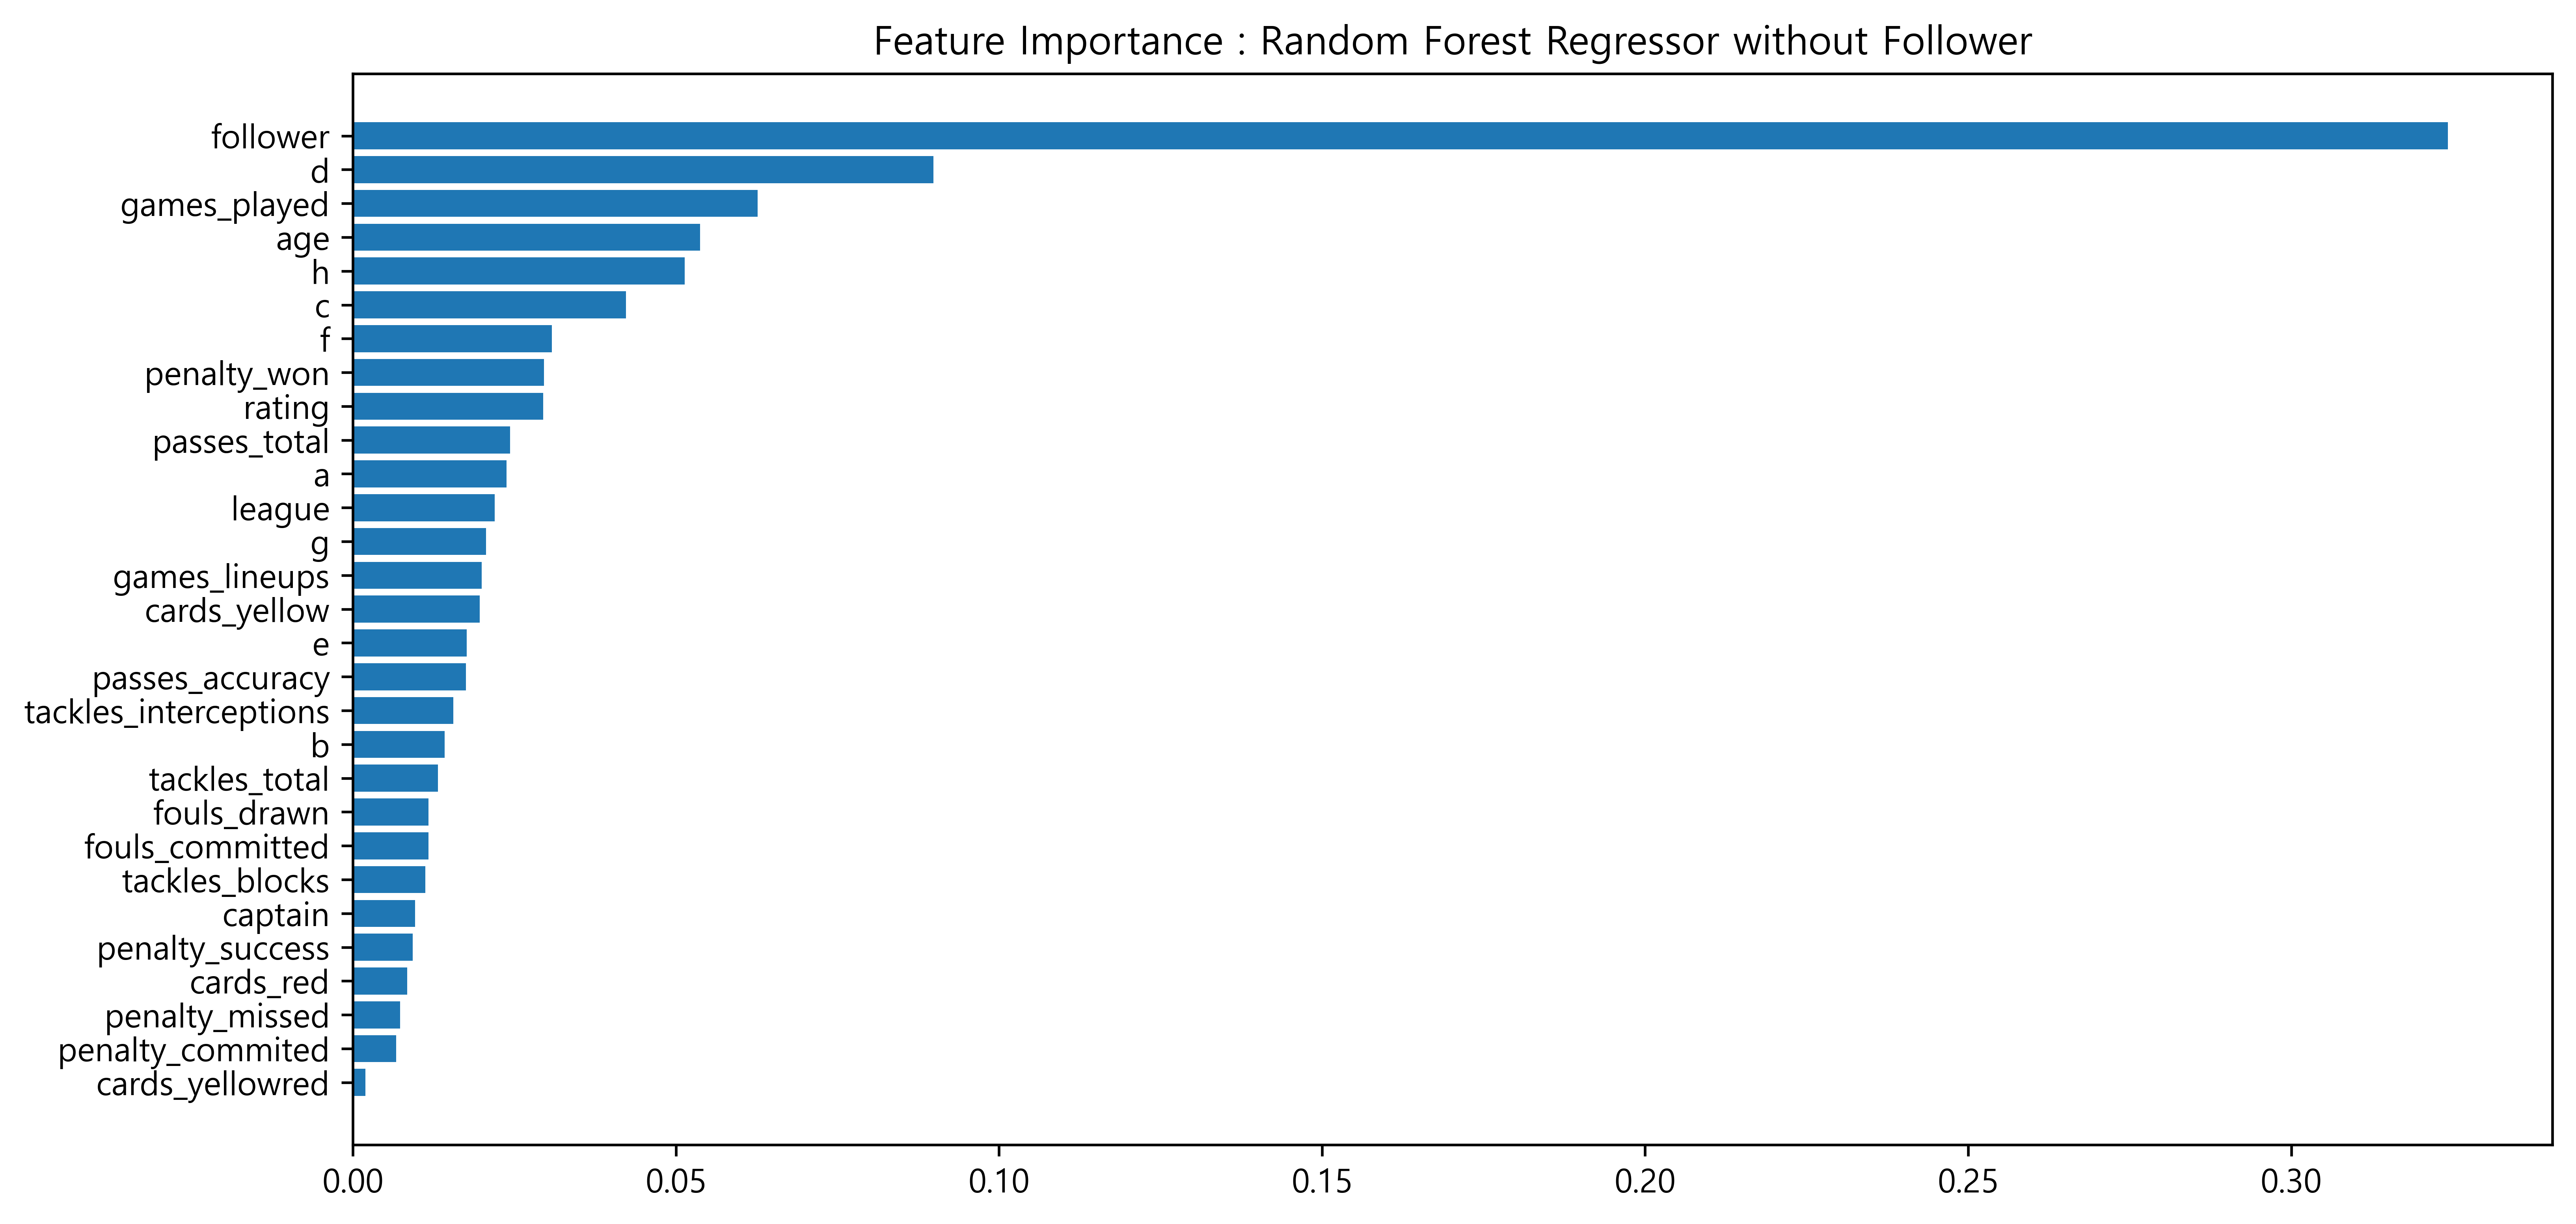

In [167]:
from matplotlib import pyplot as plt

def f_importances(coef, names):
    imp = coef
    imp,names = zip(*sorted(zip(imp,names)))
    plt.barh(range(len(names)), imp, align='center')
    plt.yticks(range(len(names)), names)
    plt.title("Feature Importance : Random Forest Regressor without Follower")
    plt.show()

f_importances(model.feature_importances_, df_1.drop('value', axis=1).columns)

# Support Vector Regressor

# No Follower

In [19]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

z = 10
cVal = list(range(25, 200, 5))
scores_rm = np.zeros([len(cVal), 3, z])
num = 0
mseListNf = []

cv = KFold(z, shuffle=True, random_state=0)
for c in cVal:
    for i, (idx_train, idx_test) in enumerate(cv.split(df_2)):
        
        df_train = df_2.iloc[idx_train]
        df_test = df_2.iloc[idx_test]

        X_train = df_train.drop('value', axis=1).astype(float)
        X_train = StandardScaler().fit_transform(X_train)
        y_train = df_train['value']

        model = SVR(kernel="rbf", C=c)
        result = model.fit(X_train, y_train)


        pred = result.predict(StandardScaler().fit_transform(df_test.drop('value', axis=1)))
        rsquared = r2_score(df_test.value, pred)
        mse = mean_squared_error(df_test.value, pred)
        
        scores_rm[num, 0, i] = rsquared
        scores_rm[num, 1, i] = mse
        scores_rm[num, 2, i] = model.score(df_test.drop("value", axis=1), df_test['value'])

    #     print("R2 = {:.8f}".format(rsquared))
    #     print("R2 Score = {:.8f}".format(scores_rm[2, i]))
    #     print("mse = {:.8f}".format(mse))

#     print("C : {} | 모델 성능 : Metrics R2 = {}, R2 Score = {}, mse = {}".format(c, scores_rm[num, 0].mean(), scores_rm[num, 2].mean(), scores_rm[num, 1].mean()))
    mseListNf.append(scores_rm[num, 1].mean())
    num += 1
    

# Follower

In [20]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR

z = 10
cVal = list(range(25, 200, 5))
scores_rm = np.zeros([len(cVal), 3, z])
num = 0
mseList = []

cv = KFold(z, shuffle=True, random_state=0)
for c in cVal:
    for i, (idx_train, idx_test) in enumerate(cv.split(df_1)):
        
        df_train = df_1.iloc[idx_train]
        df_test = df_1.iloc[idx_test]

        X_train = df_train.drop('value', axis=1).astype(float)
        X_train = StandardScaler().fit_transform(X_train)
        y_train = df_train['value']

        model = SVR(kernel="rbf", C=c)
        result = model.fit(X_train, y_train)


        pred = result.predict(StandardScaler().fit_transform(df_test.drop('value', axis=1)))
        rsquared = r2_score(df_test.value, pred)
        mse = mean_squared_error(df_test.value, pred)
        
        scores_rm[num, 0, i] = rsquared
        scores_rm[num, 1, i] = mse
        scores_rm[num, 2, i] = model.score(df_test.drop("value", axis=1), df_test['value'])

    #     print("R2 = {:.8f}".format(rsquared))
    #     print("R2 Score = {:.8f}".format(scores_rm[2, i]))
    #     print("mse = {:.8f}".format(mse))

#     print("C : {} | 모델 성능 : Metrics R2 = {}, R2 Score = {}, mse = {}".format(c, scores_rm[num, 0].mean(), scores_rm[num, 2].mean(), scores_rm[num, 1].mean()))
    mseList.append(scores_rm[num, 1].mean())
    num += 1
    

C:\Users\Gk\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  This is separate from the ipykernel package so we can avoid doing imports until


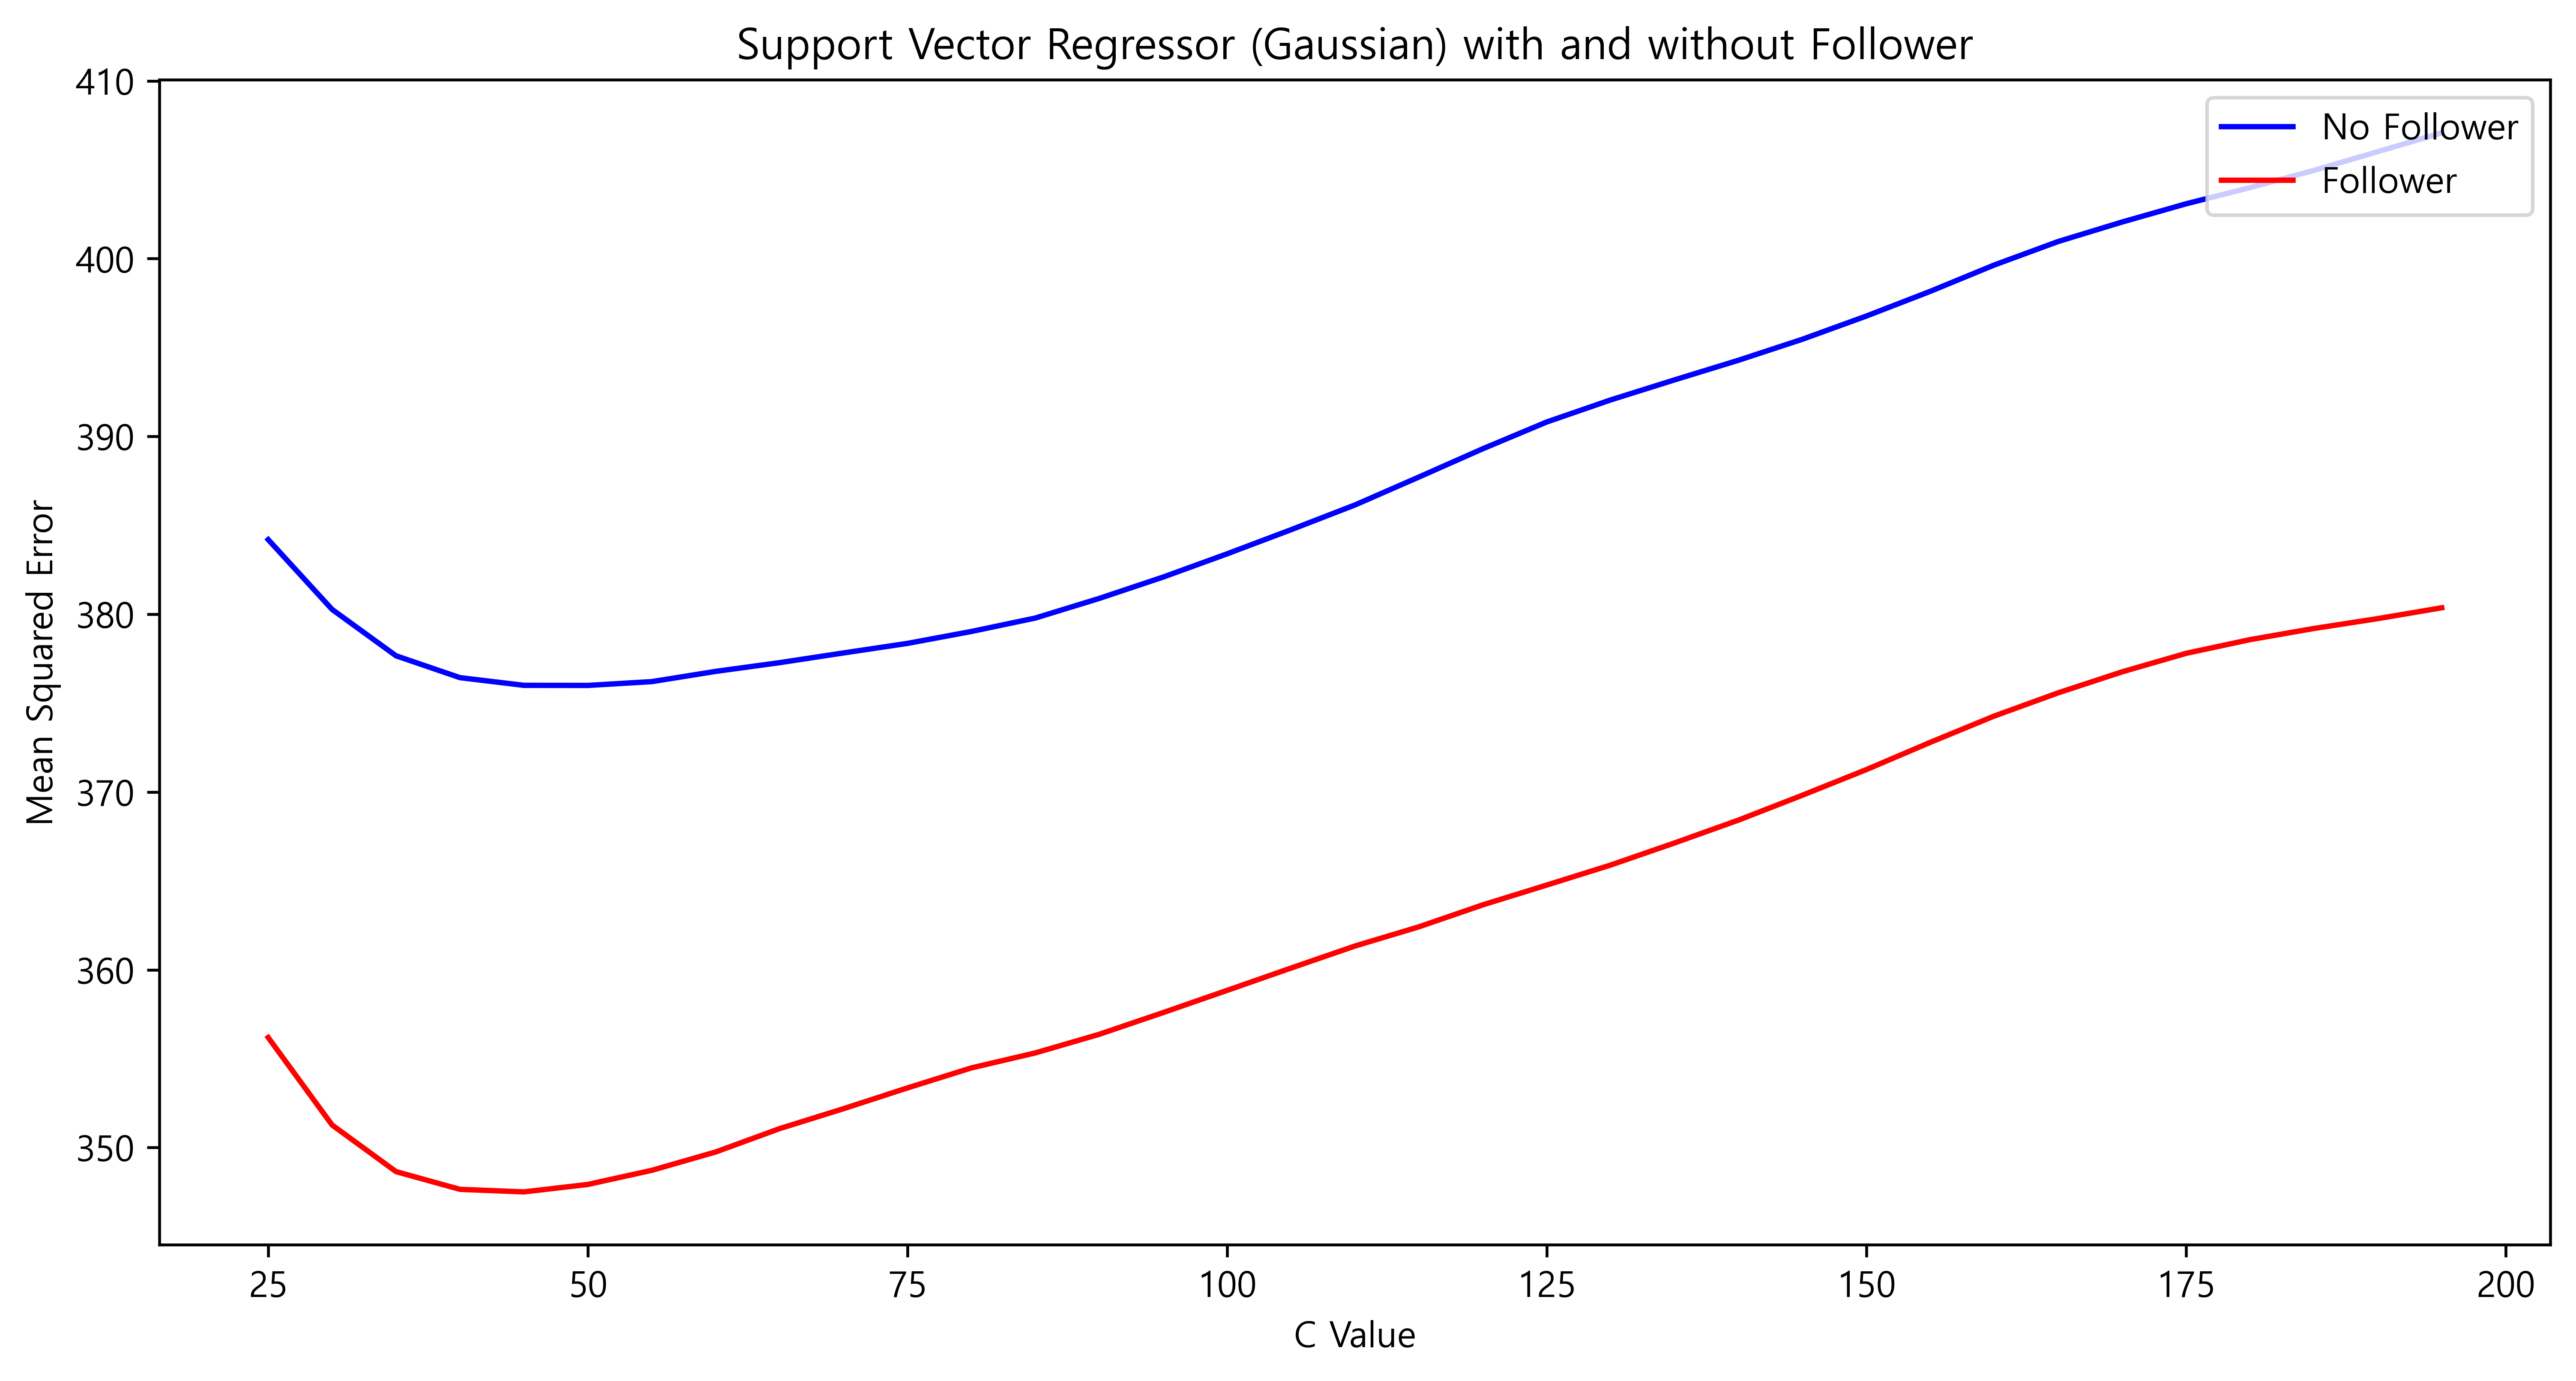

In [21]:
cVal = list(range(25, 200, 5))
fig = plt.figure()
fig.show()
ax = fig.add_subplot(111)

ax.plot(cVal, mseListNf, color='blue', label='No Follower')
ax.plot(cVal, mseList, color='red', label='Follower')
plt.legend(loc='upper right')
plt.title('Support Vector Regressor (Gaussian) with and without Follower')
plt.xlabel('C Value')
plt.ylabel('Mean Squared Error')
plt.draw()

In [22]:
mseListNf

[384.19696087618854,
 380.2674497656684,
 377.659772739437,
 376.4313643250538,
 375.9990874057154,
 375.9938288807639,
 376.2078716851196,
 376.7835516579596,
 377.2748493351332,
 377.8215077611142,
 378.3579567539565,
 379.0286187964556,
 379.78424226484304,
 380.887671780302,
 382.0898933297827,
 383.395727554018,
 384.75158920117946,
 386.1443765538756,
 387.7147749573186,
 389.30635856102606,
 390.8118306715441,
 392.0533958892026,
 393.18091266408044,
 394.28493362786276,
 395.4664823454626,
 396.77130697089706,
 398.1615561091402,
 399.6419917003946,
 400.9631719126874,
 402.05964728074434,
 403.08328196109153,
 403.9951321151311,
 404.9634073125607,
 406.01875103342996,
 407.07726489035815]

In [23]:
mseList

[356.18997176543434,
 351.2673082518874,
 348.6450305917247,
 347.6493581567239,
 347.50578831765546,
 347.92476007977814,
 348.7178268803581,
 349.75121293933887,
 351.0643667063665,
 352.18626903592525,
 353.35378687293337,
 354.47997024039546,
 355.32282479336516,
 356.3700777966461,
 357.59202306922657,
 358.8399378279863,
 360.09600761673397,
 361.33519262587254,
 362.4150326409244,
 363.6513165356131,
 364.76448074915453,
 365.8904588681258,
 367.1337816243975,
 368.41883371454355,
 369.8187173144741,
 371.259174172252,
 372.79246598640964,
 374.2713640386594,
 375.5770062720445,
 376.7569585523864,
 377.7975394975249,
 378.56867290270134,
 379.1968234867444,
 379.7521602244077,
 380.3618256214305]

In [24]:
cVal

[25,
 30,
 35,
 40,
 45,
 50,
 55,
 60,
 65,
 70,
 75,
 80,
 85,
 90,
 95,
 100,
 105,
 110,
 115,
 120,
 125,
 130,
 135,
 140,
 145,
 150,
 155,
 160,
 165,
 170,
 175,
 180,
 185,
 190,
 195]